<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_10_27_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fitter

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout  , BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import cm



In [4]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [5]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [6]:
pd.read_csv(total_file_link[2])

r/R  mean_delta_x  std_delta_x  mean_delta_y  std_delta_y  \
0   0.2001        0.0434       0.0026       -0.0126       0.0013   
1   0.2499       -0.0157       0.0019       -0.0235       0.0031   
2   0.2998       -0.0418       0.0016       -0.0514       0.0053   
3   0.3498       -0.0550       0.0016       -0.0961       0.0091   
4   0.3913       -0.0646       0.0024       -0.1332       0.0133   
5   0.4496       -0.1020       0.0026       -0.1704       0.0173   
6   0.4997       -0.1255       0.0030       -0.2004       0.0207   
7   0.5387       -0.1535       0.0028       -0.2193       0.0230   
8   0.5996       -0.1964       0.0031       -0.2466       0.0273   
9   0.6498       -0.2235       0.0031       -0.2726       0.0316   
10  0.6998       -0.2741       0.0030       -0.2945       0.0354   
11  0.7500       -0.3002       0.0029       -0.3091       0.0391   
12  0.8001       -0.3363       0.0029       -0.3486       0.0430   
13  0.8497       -0.3810       0.0031       -0.3719       0.0474   
14  0.9102       -0.4236       0.0032       -0.3486       0.0526   
15  0.9734       -0.3914       0.0037       -0.3834       0.0581   

    mean_delta_z  std_delta_z  
0        -0.0162       0.0040  
1        -0.0061       0.0079  
2        -0.0781       0.0130  
3        -0.1268       0.0216  
4        -0.1839       0.0303  
5        -0.3251       0.0405  
6        -0.4803       0.0503  
7        -0.6758       0.0569  
8        -0.9893       0.0678  
9        -1.3829       0.0783  
10       -1.7870       0.0876  
11       -2.2590       0.0965  
12       -2.7745       0.1069  
13       -3.3516       0.1185  
14       -4.1247       0.1339  
15       -4.8769       0.1475

In [7]:
total_alpha_content = [ i / 1000 for i in range( 1 , 4 )  ]
total_flat_content  = [ i for i in range(1 , 5 ) ]
total_location      = list(range( 5 , 16 ))

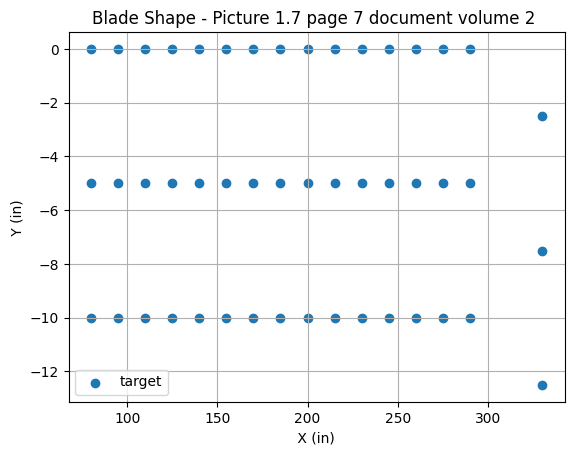

In [8]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [9]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,
    'ann'           : []


}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


In [10]:
total_noew_for_generate  = []
total_noew_for_fault1    = []
total_noew_for_fault2    = []
total_noew_for_fault3    = []

In [11]:
for_each_generate_health   = []
for_each_generate_health_t = []
for_each_generate_fault    = []
for_each_generate_fault_t  = []

iter_alpha : 0.001 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.983748892393396
r2_score in Simulation Failt  void  for Each Blade :  0.9751651294409446
Error in Simulation Fault for Each Blade :  -0.4317550497318208  --- r2_score Fault S ----  0.9884046759216106
Error in Simulation Fault T  for Each Blade :  -0.4317550497318208  --- r2_score Fault T :  0.9836082478767826
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9812536947632589
r2_score in Simulation Failt  void  for Each Blade :  0.9805971042057834
Error in Simulation Fault for Each Blade :  1.000603786199318  --- r2_score Fault S ----  0.9647942692425577
Error in Simulation Fault T  for Each Blade :  1.000603786199318  --- r2_score Fault T :  0.9823234805566827
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9825918373046568
r2_score in Simulation Failt  void  for Each Blade :  0.987283827934694
Error in Simulation Fault fo

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


Error in Simulation Fault T  for Each Blade :  0.23903059440930097  --- r2_score Fault T :  0.9758783125631569
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9858918823939538
r2_score in Simulation Failt  void  for Each Blade :  0.9788307603072421
Error in Simulation Fault for Each Blade :  -0.1359810514532389  --- r2_score Fault S ----  0.9904031263386156
Error in Simulation Fault T  for Each Blade :  -0.1359810514532389  --- r2_score Fault T :  0.9866113779327279
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9797723039068095
r2_score in Simulation Failt  void  for Each Blade :  0.9776190190453381
Error in Simulation Fault for Each Blade :  0.5277353491045824  --- r2_score Fault S ----  0.9805910386472151
Error in Simulation Fault T  for Each Blade :  0.5277353491045824  --- r2_score Fault T :  0.9846690889478095
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.03      0.29      0.06         7
         1.0       0.96      0.70      0.81       191

    accuracy                           0.69       198
   macro avg       0.50      0.49      0.44       198
weighted avg       0.93      0.69      0.79       198

accuracy accuracy_random_forest  : 0.6868686868686869
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - acc: 0.3209 - loss: 0.8762 - val_acc: 0.2796 - val_loss: 0.7864
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4001 - loss: 0.8283 - val_acc: 0.2796 - val_loss: 0.7703
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4391 - loss: 0.8033 - val_acc: 0.2796 - val_loss: 0.7533
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4898 - loss: 0.7881 - val_acc: 0.2796 - val_loss: 0.7373
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5156 - loss: 0.7722 - val_acc: 0.2903 - val_loss: 0.7239
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5362 - loss: 0.7594 - val_acc: 0.7204 - val_loss: 0.7112
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5698 - loss: 0.7316 - val_acc: 0.7204 - val_loss: 0.6982
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6066 - loss: 0.7146 - val_acc: 0.7204 - val_loss: 0.6868
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6434 - loss: 0.6980 - val_acc:

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

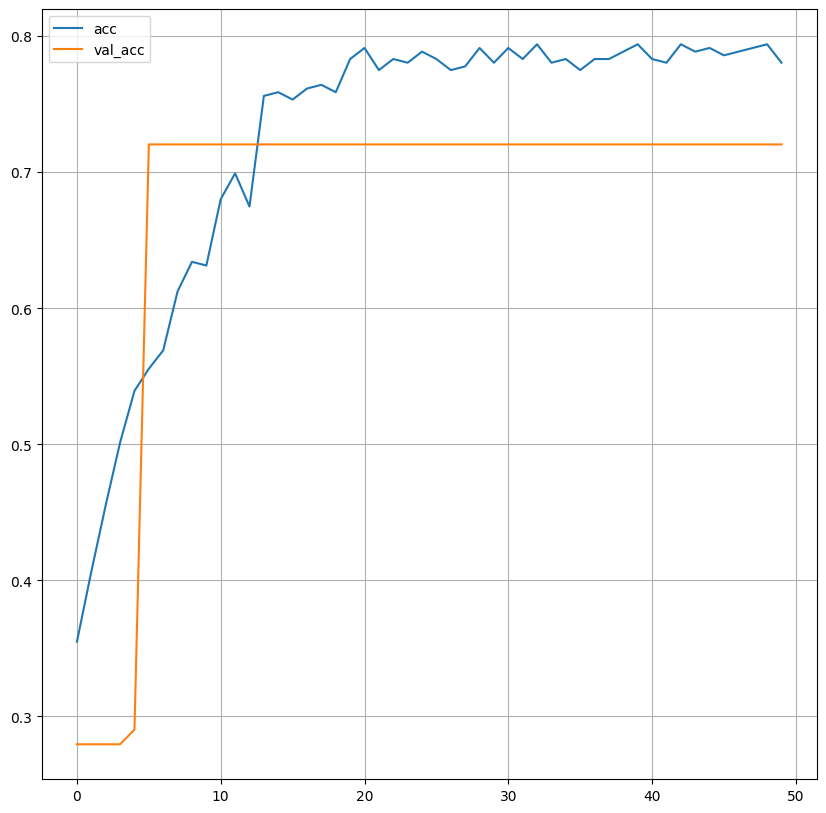

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7127 - loss: 0.6539 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9816369283580862
r2_score in Simulation Failt  void  for Each Blade :  0.9849295781931198
Error in Simulation Fault for Each Blade :  1.411879087652688  --- r2_score Fault S ----  0.9533952244108963
Error in Simulation Fault T  for Each Blade :  1.411879087652688  --- r2_score Fault T :  0.98908388085602
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9792768476175112
r2_score in Simulation Failt  void  for Each Blade :  0.9720439507458443
Error in Simulation Fault for Each Blade :  0.36902805793322124  --- r2_score Fault S ----  0.9866306098625197
Error in Simulation Fault T  for Each Blade :  0.36902805793322124  --- r2_score Fault T :  0.9862101085757089
 ----- for each Blade Simulated ----- 
r2_score

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


Error in Simulation Fault T  for Each Blade :  -0.26249434567275776  --- r2_score Fault T :  0.9934971663353723
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.991843009742108
r2_score in Simulation Failt  void  for Each Blade :  0.9703857684233251
Error in Simulation Fault for Each Blade :  0.6902254374356749  --- r2_score Fault S ----  0.983537538944359
Error in Simulation Fault T  for Each Blade :  0.6902254374356749  --- r2_score Fault T :  0.9795702357793691
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9919937080814029
r2_score in Simulation Failt  void  for Each Blade :  0.9804579410174107
Error in Simulation Fault for Each Blade :  -0.6060436557695776  --- r2_score Fault S ----  0.982283812918225
Error in Simulation Fault T  for Each Blade :  -0.6060436557695776  --- r2_score Fault T :  0.9633978809611313
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.96

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.03      1.00      0.07         2
         1.0       1.00      0.71      0.83       196

    accuracy                           0.71       198
   macro avg       0.52      0.85      0.45       198
weighted avg       0.99      0.71      0.82       198

accuracy accuracy_random_forest  : 0.702020202020202
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - acc: 0.3116 - loss: 0.8124 - val_acc: 0.2796 - val_loss: 0.7705
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3170 - loss: 0.7957 - val_acc: 0.2796 - val_loss: 0.7539
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3704 - loss: 0.7671 - val_acc: 0.2796 - val_loss: 0.7392
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4522 - loss: 0.7480 - val_acc: 0.2688 - val_loss: 0.7253
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4795 - loss: 0.7366 - val_acc: 0.7204 - val_loss: 0.7119
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5839 - loss: 0.7124 - val_acc: 0.7204 - val_loss: 0.7002
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.5922 - loss: 0.6956 - val_acc: 0.7204 - val_loss: 0.6898
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6452 - loss: 0.6742 - val_acc: 0.7204 - val_loss: 0.6794
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6325 - loss: 0.6754 - val_a

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

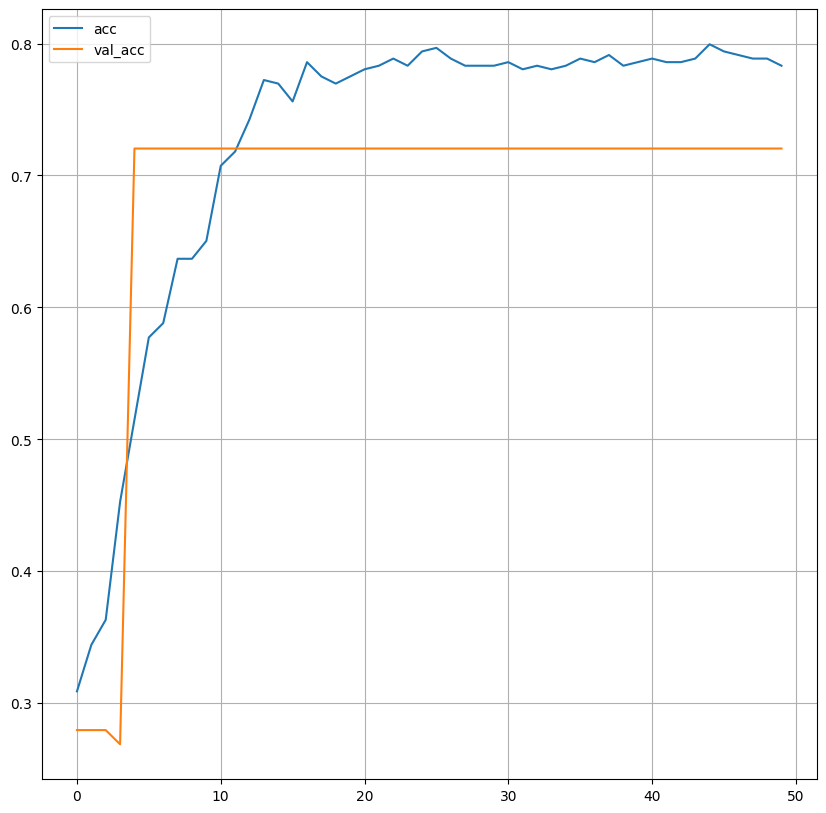

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7127 - loss: 0.6410 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9935152303950803
r2_score in Simulation Failt  void  for Each Blade :  0.9699161535349662
Error in Simulation Fault for Each Blade :  -0.465734205630562  --- r2_score Fault S ----  0.9818404520093553
Error in Simulation Fault T  for Each Blade :  -0.465734205630562  --- r2_score Fault T :  0.9831736512101152
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9630301442872663
r2_score in Simulation Failt  void  for Each Blade :  0.978252974697647
Error in Simulation Fault for Each Blade :  -0.7338729994437592  --- r2_score Fault S ----  0.9880990025731681
Error in Simulation Fault T  for Each Blade :  -0.7338729994437592  --- r2_score Fault T :  0.9635127519956769
 ----- for each Blade Simulated ----- 
r2_sc

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


r2_score in Simulation Failt  void  for Each Blade :  0.9854005436619805
Error in Simulation Fault for Each Blade :  0.3126018994246442  --- r2_score Fault S ----  0.9892164492576914
Error in Simulation Fault T  for Each Blade :  0.3126018994246442  --- r2_score Fault T :  0.9837869062211694
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9765822910388484
r2_score in Simulation Failt  void  for Each Blade :  0.9717649460387311
Error in Simulation Fault for Each Blade :  0.7216225049990383  --- r2_score Fault S ----  0.9755081882648896
Error in Simulation Fault T  for Each Blade :  0.7216225049990383  --- r2_score Fault T :  0.9388017923656379
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.976577327488136
r2_score in Simulation Failt  void  for Each Blade :  0.9899656977844402
Error in Simulation Fault for Each Blade :  -0.5113158692998461  --- r2_score Fault S ----  0.9738617833705377
Error in Simulation

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.99      0.70      0.82       196

    accuracy                           0.69       198
   macro avg       0.49      0.35      0.41       198
weighted avg       0.98      0.69      0.81       198

accuracy accuracy_random_forest  : 0.7070707070707071
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.5148 - loss: 0.7145 - val_acc: 0.7204 - val_loss: 0.7068
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5408 - loss: 0.7012 - val_acc: 0.7204 - val_loss: 0.6942
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.6329 - loss: 0.6804 - val_acc: 0.7204 - val_loss: 0.6824
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6720 - loss: 0.6567 - val_acc: 0.7204 - val_loss: 0.6719
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7085 - loss: 0.6471 - val_acc: 0.7204 - val_loss: 0.6627
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.7301 - loss: 0.6439 - val_acc: 0.7204 - val_loss: 0.6541
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.7778 - loss: 0.6175 - val_acc: 0.7204 - val_loss: 0.6461
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.7703 - loss: 0.6202 - val_acc: 0.7204 - val_loss: 0.6395
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7651 - loss: 0.6178 - val_acc: 0.7204 

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

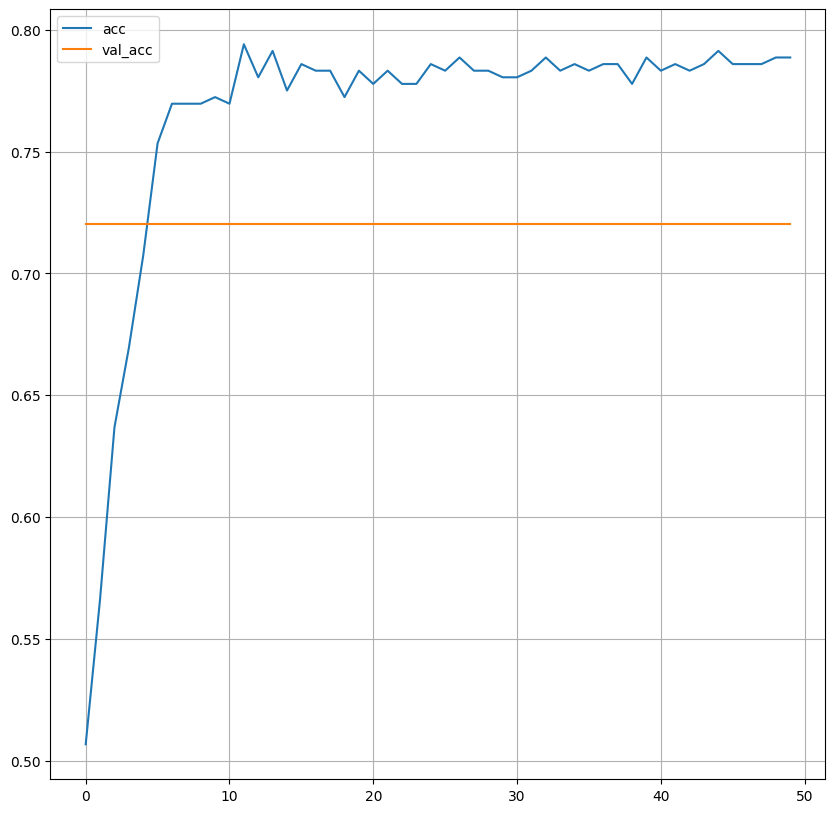

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7127 - loss: 0.6523 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9676169631135458
r2_score in Simulation Failt  void  for Each Blade :  0.9751774680443681
Error in Simulation Fault for Each Blade :  1.4883656001820702  --- r2_score Fault S ----  0.9832174435359545
Error in Simulation Fault T  for Each Blade :  1.4883656001820702  --- r2_score Fault T :  0.9604298008027463
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9744329798317025
r2_score in Simulation Failt  void  for Each Blade :  0.9810361261258815
Error in Simulation Fault for Each Blade :  1.0491777751221254  --- r2_score Fault S ----  0.9823795529651113
Error in Simulation Fault T  for Each Blade :  1.0491777751221254  --- r2_score Fault T :  0.9870546273714642
 ----- for each Blade Simulated ----- 
r2_sco

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


Error in Simulation Fault for Each Blade :  -0.792954707593255  --- r2_score Fault S ----  0.9918588248035947
Error in Simulation Fault T  for Each Blade :  -0.792954707593255  --- r2_score Fault T :  0.9706326116812359
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9850498880025045
r2_score in Simulation Failt  void  for Each Blade :  0.970237444567586
Error in Simulation Fault for Each Blade :  0.5244926191268586  --- r2_score Fault S ----  0.9913901331733884
Error in Simulation Fault T  for Each Blade :  0.5244926191268586  --- r2_score Fault T :  0.9757916819733532
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9776010768647497
r2_score in Simulation Failt  void  for Each Blade :  0.9918463127585017
Error in Simulation Fault for Each Blade :  0.15160094958735293  --- r2_score Fault S ----  0.9820559269086345
Error in Simulation Fault T  for Each Blade :  0.15160094958735293  --- r2_score Fault T :  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validati

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.70      0.82       198

    accuracy                           0.70       198
   macro avg       0.50      0.35      0.41       198
weighted avg       1.00      0.70      0.82       198

accuracy accuracy_random_forest  : 0.702020202020202
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc: 0.2156 - loss: 0.8376 - val_acc: 0.2796 - val_loss: 0.7845
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2949 - loss: 0.8083 - val_acc: 0.2796 - val_loss: 0.7698
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3533 - loss: 0.7834 - val_acc: 0.2796 - val_loss: 0.7568
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3827 - loss: 0.7719 - val_acc: 0.2796 - val_loss: 0.7442
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4326 - loss: 0.7504 - val_acc: 0.7204 - val_loss: 0.7326
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5415 - loss: 0.7372 - val_acc: 0.7204 - val_loss: 0.7216
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.6939 - loss: 0.7174 - val_acc: 0.7204 - val_loss: 0.7112
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6530 - loss: 0.7079 - val_acc: 0.7204 - val_loss: 0.7014
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.7241 - loss: 0.6945 - val_acc: 0.7204

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

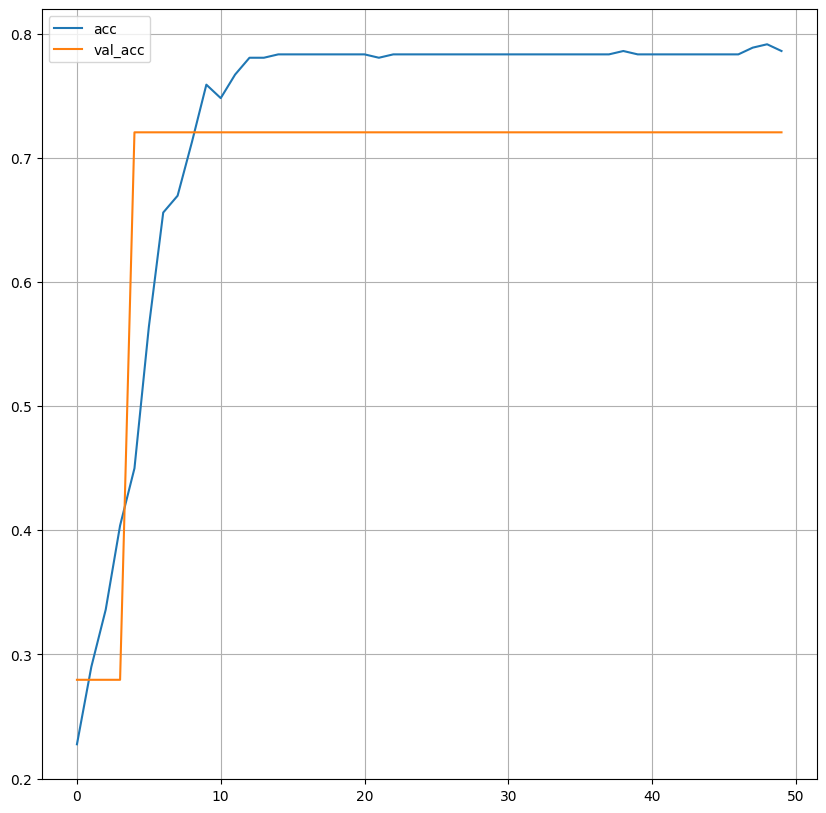

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7127 - loss: 0.6254 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9657754786315375
r2_score in Simulation Failt  void  for Each Blade :  0.957777378197654
Error in Simulation Fault for Each Blade :  -2.312493096712449  --- r2_score Fault S ----  0.9779918473370935
Error in Simulation Fault T  for Each Blade :  -2.312493096712449  --- r2_score Fault T :  0.9784784500718745
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9727881991305625
r2_score in Simulation Failt  void  for Each Blade :  0.9837160656139934
Error in Simulation Fault for Each Blade :  -0.6599604149114884  --- r2_score Fault S ----  0.9842144407508241
Error in Simulation Fault T  for Each Blade :  -0.6599604149114884  --- r2_score Fault T :  0.9884934873812481
 ----- for each Blade Simulated ----- 
r2_sc

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


Error in Simulation Fault T  for Each Blade :  -0.5510308193682003  --- r2_score Fault T :  0.9874435353688737
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9896661020340316
r2_score in Simulation Failt  void  for Each Blade :  0.954245549244776
Error in Simulation Fault for Each Blade :  0.6143239331274666  --- r2_score Fault S ----  0.9877398234407067
Error in Simulation Fault T  for Each Blade :  0.6143239331274666  --- r2_score Fault T :  0.9896546290931832
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.984682331154566
r2_score in Simulation Failt  void  for Each Blade :  0.9781217030337924
Error in Simulation Fault for Each Blade :  -0.1602099595929285  --- r2_score Fault S ----  0.9865735810754226
Error in Simulation Fault T  for Each Blade :  -0.1602099595929285  --- r2_score Fault T :  0.9877235850958662
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.98

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.02      1.00      0.03         1
         1.0       1.00      0.71      0.83       197

    accuracy                           0.71       198
   macro avg       0.51      0.85      0.43       198
weighted avg       1.00      0.71      0.82       198

accuracy accuracy_random_forest  : 0.6868686868686869
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.4032 - loss: 0.7772 - val_acc: 0.2796 - val_loss: 0.8404
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4146 - loss: 0.7662 - val_acc: 0.2796 - val_loss: 0.8149
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.5093 - loss: 0.7267 - val_acc: 0.2796 - val_loss: 0.7902
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5170 - loss: 0.7150 - val_acc: 0.2796 - val_loss: 0.7687
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.5539 - loss: 0.7066 - val_acc: 0.2796 - val_loss: 0.7487
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6105 - loss: 0.6859 - val_acc: 0.2796 - val_loss: 0.7310
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6687 - loss: 0.6672 - val_acc: 0.7204 - val_loss: 0.7148
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.7094 - loss: 0.6556 - val_acc: 0.7204 - val_loss: 0.7004
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7168 - loss: 0.6385 - val_acc: 0.7204 

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

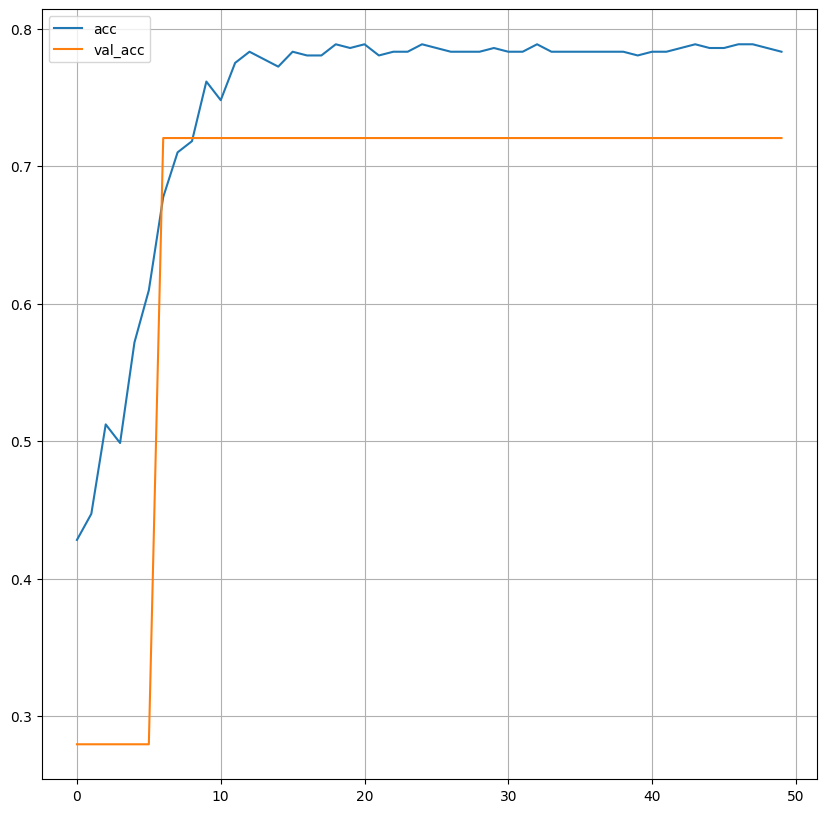

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7127 - loss: 0.6521 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.967330676568577
r2_score in Simulation Failt  void  for Each Blade :  0.9541335398833627
Error in Simulation Fault for Each Blade :  0.21253752825372652  --- r2_score Fault S ----  0.9774420306507356
Error in Simulation Fault T  for Each Blade :  0.21253752825372652  --- r2_score Fault T :  0.9702212185492214
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9844688525376445
r2_score in Simulation Failt  void  for Each Blade :  0.9765832005070484
Error in Simulation Fault for Each Blade :  1.5245648050160767  --- r2_score Fault S ----  0.9809065822315112
Error in Simulation Fault T  for Each Blade :  1.5245648050160767  --- r2_score Fault T :  0.9865558641778063
 ----- for each Blade Simulated ----- 
r2_sc

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


Error in Simulation Fault T  for Each Blade :  -0.4287949405739462  --- r2_score Fault T :  0.969984940260673
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9854588169249295
r2_score in Simulation Failt  void  for Each Blade :  0.9804876387488708
Error in Simulation Fault for Each Blade :  -0.2519267484136405  --- r2_score Fault S ----  0.9888649818633605
Error in Simulation Fault T  for Each Blade :  -0.2519267484136405  --- r2_score Fault T :  0.9860369276956328
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9811292296973348
r2_score in Simulation Failt  void  for Each Blade :  0.9846991450418159
Error in Simulation Fault for Each Blade :  -0.23480291862538172  --- r2_score Fault S ----  0.986466993475673
Error in Simulation Fault T  for Each Blade :  -0.23480291862538172  --- r2_score Fault T :  0.9706014352542521
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validati

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.70      0.82       198

    accuracy                           0.70       198
   macro avg       0.50      0.35      0.41       198
weighted avg       1.00      0.70      0.82       198

accuracy accuracy_random_forest  : 0.702020202020202
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - acc: 0.4282 - loss: 0.9020 - val_acc: 0.2796 - val_loss: 0.8567
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5744 - loss: 0.8660 - val_acc: 0.2796 - val_loss: 0.8422
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5723 - loss: 0.8547 - val_acc: 0.2796 - val_loss: 0.8299
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.5899 - loss: 0.8354 - val_acc: 0.7204 - val_loss: 0.8178
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6328 - loss: 0.8172 - val_acc: 0.7204 - val_loss: 0.8043
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6760 - loss: 0.8033 - val_acc: 0.7204 - val_loss: 0.7915
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7465 - loss: 0.7906 - val_acc: 0.7204 - val_loss: 0.7791
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7304 - loss: 0.7806 - val_acc: 0.7204 - val_loss: 0.7676
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7699 - loss: 0.7589 - val_acc: 0.720

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

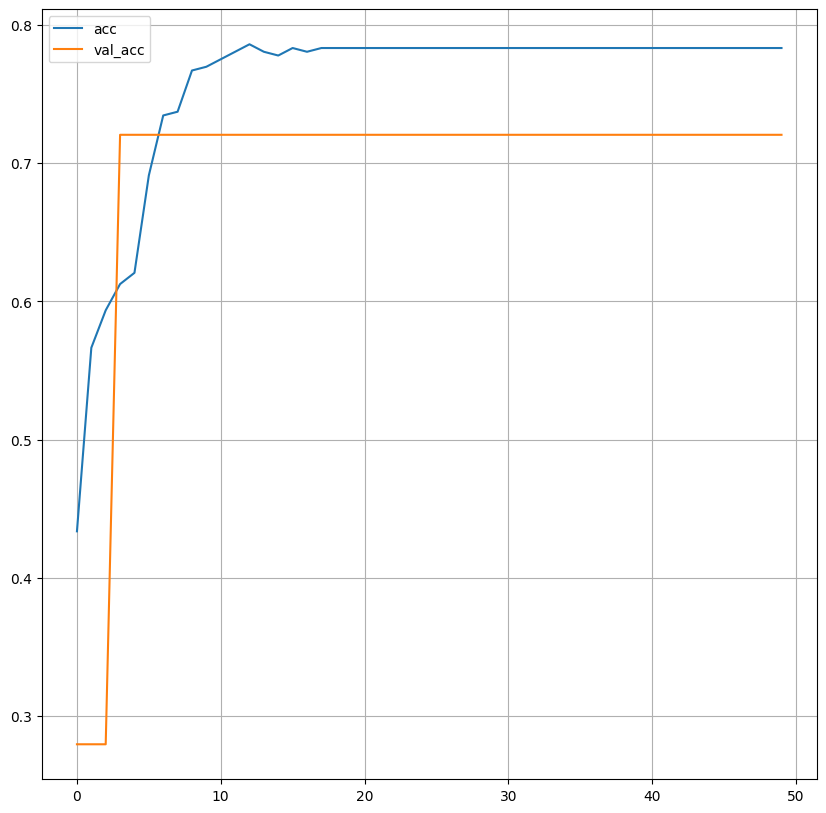

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7127 - loss: 0.6159 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9782243642609496
r2_score in Simulation Failt  void  for Each Blade :  0.9835138859180308
Error in Simulation Fault for Each Blade :  0.48417797456223965  --- r2_score Fault S ----  0.9851786817632869
Error in Simulation Fault T  for Each Blade :  0.48417797456223965  --- r2_score Fault T :  0.9770523192804984
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9728436694695013
r2_score in Simulation Failt  void  for Each Blade :  0.9781952491200083
Error in Simulation Fault for Each Blade :  2.230059880142184  --- r2_score Fault S ----  0.9675026718148759
Error in Simulation Fault T  for Each Blade :  2.230059880142184  --- r2_score Fault T :  0.9859727703552101
 ----- for each Blade Simulated ----- 
r2_sco

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


r2_score in Simulation Health for Each Blade :  0.9836498318449228
r2_score in Simulation Failt  void  for Each Blade :  0.9403539758833774
Error in Simulation Fault for Each Blade :  3.8208374562983956  --- r2_score Fault S ----  0.9091511311179561
Error in Simulation Fault T  for Each Blade :  3.8208374562983956  --- r2_score Fault T :  0.9616858623479474
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9839541967883269
r2_score in Simulation Failt  void  for Each Blade :  0.9746470915752962
Error in Simulation Fault for Each Blade :  2.00181972440895  --- r2_score Fault S ----  0.9866920452432603
Error in Simulation Fault T  for Each Blade :  2.00181972440895  --- r2_score Fault T :  0.9775778967313946
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9917866327675076
r2_score in Simulation Failt  void  for Each Blade :  0.9649423008976076
Error in Simulation Fault for Each Blade :  -0.5621117360606243  -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validati

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.70      0.82       198

    accuracy                           0.70       198
   macro avg       0.50      0.35      0.41       198
weighted avg       1.00      0.70      0.82       198

accuracy accuracy_random_forest  : 0.702020202020202
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - acc: 0.2231 - loss: 0.9766 - val_acc: 0.2796 - val_loss: 0.9505
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.2063 - loss: 0.9445 - val_acc: 0.2796 - val_loss: 0.9238
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.2183 - loss: 0.8974 - val_acc: 0.2796 - val_loss: 0.8986
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.2145 - loss: 0.8738 - val_acc: 0.2796 - val_loss: 0.8738
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.2121 - loss: 0.8531 - val_acc: 0.2796 - val_loss: 0.8498
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.2337 - loss: 0.8350 - val_acc: 0.2796 - val_loss: 0.8274
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.2129 - loss: 0.8090 - val_acc: 0.2796 - val_loss: 0.8069
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2506 - loss: 0.7912 - val_acc: 0.2796 - val_loss: 0.7880
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.3083 - loss: 0.7581 - val_acc: 0.

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

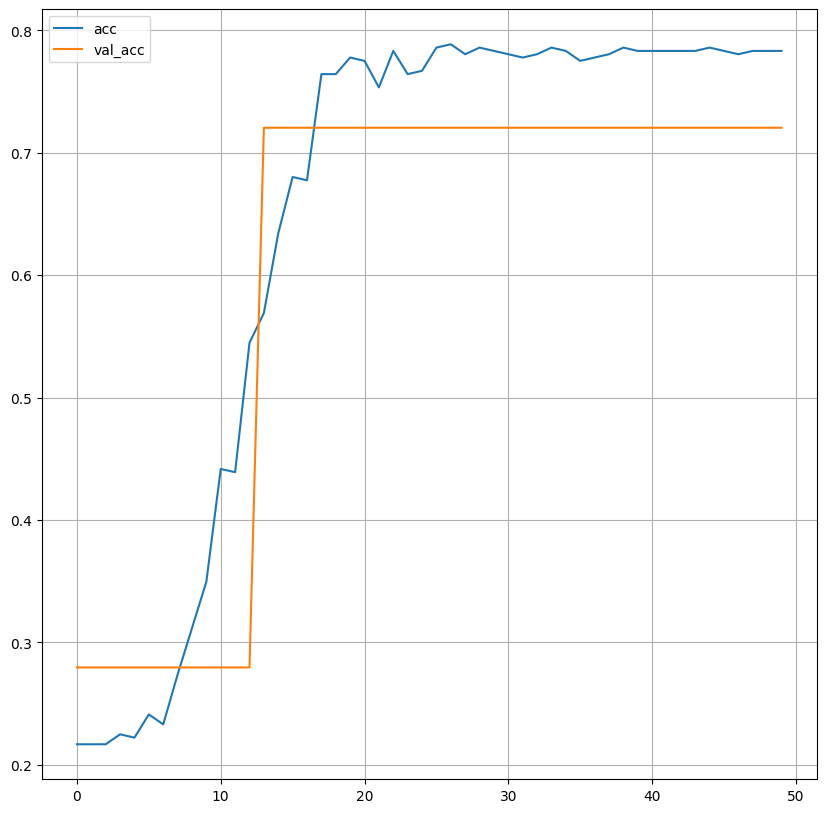

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7127 - loss: 0.6234 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9792506100478372
r2_score in Simulation Failt  void  for Each Blade :  0.971841010715713
Error in Simulation Fault for Each Blade :  -2.030388103110153  --- r2_score Fault S ----  0.9737042795187894
Error in Simulation Fault T  for Each Blade :  -2.030388103110153  --- r2_score Fault T :  0.9673093256076046
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9848825644723005
r2_score in Simulation Failt  void  for Each Blade :  0.9859404209836661
Error in Simulation Fault for Each Blade :  -0.27334814128134166  --- r2_score Fault S ----  0.9915886269745134
Error in Simulation Fault T  for Each Blade :  -0.27334814128134166  --- r2_score Fault T :  0.9670153216438808
 ----- for each Blade Simulated ----- 
r2_

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


Error in Simulation Fault T  for Each Blade :  -0.8177140635186615  --- r2_score Fault T :  0.9896667528229931
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9745218172330988
r2_score in Simulation Failt  void  for Each Blade :  0.9753164969652508
Error in Simulation Fault for Each Blade :  -2.1570500192958098  --- r2_score Fault S ----  0.9736691560746374
Error in Simulation Fault T  for Each Blade :  -2.1570500192958098  --- r2_score Fault T :  0.9661712323756732
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9526940057039093
r2_score in Simulation Failt  void  for Each Blade :  0.9828241655719543
Error in Simulation Fault for Each Blade :  -2.1189690782818413  --- r2_score Fault S ----  0.9667262776135214
Error in Simulation Fault T  for Each Blade :  -2.1189690782818413  --- r2_score Fault T :  0.9586317149745984
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.02      0.12      0.03         8
         1.0       0.95      0.69      0.80       190

    accuracy                           0.67       198
   macro avg       0.48      0.41      0.42       198
weighted avg       0.91      0.67      0.77       198

accuracy accuracy_random_forest  : 0.702020202020202
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - acc: 0.6197 - loss: 0.6884 - val_acc: 0.7204 - val_loss: 0.6546
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6785 - loss: 0.6690 - val_acc: 0.7204 - val_loss: 0.6469
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7272 - loss: 0.6451 - val_acc: 0.7204 - val_loss: 0.6392
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.7469 - loss: 0.6327 - val_acc: 0.7204 - val_loss: 0.6322
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7936 - loss: 0.6158 - val_acc: 0.7204 - val_loss: 0.6258
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7568 - loss: 0.6134 - val_acc: 0.7204 - val_loss: 0.6202
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.7518 - loss: 0.6129 - val_acc: 0.7204 - val_loss: 0.6153
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7771 - loss: 0.5897 - val_acc: 0.7204 - val_loss: 0.6107
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.7416 - loss: 0.6023 - val_acc: 0.7

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

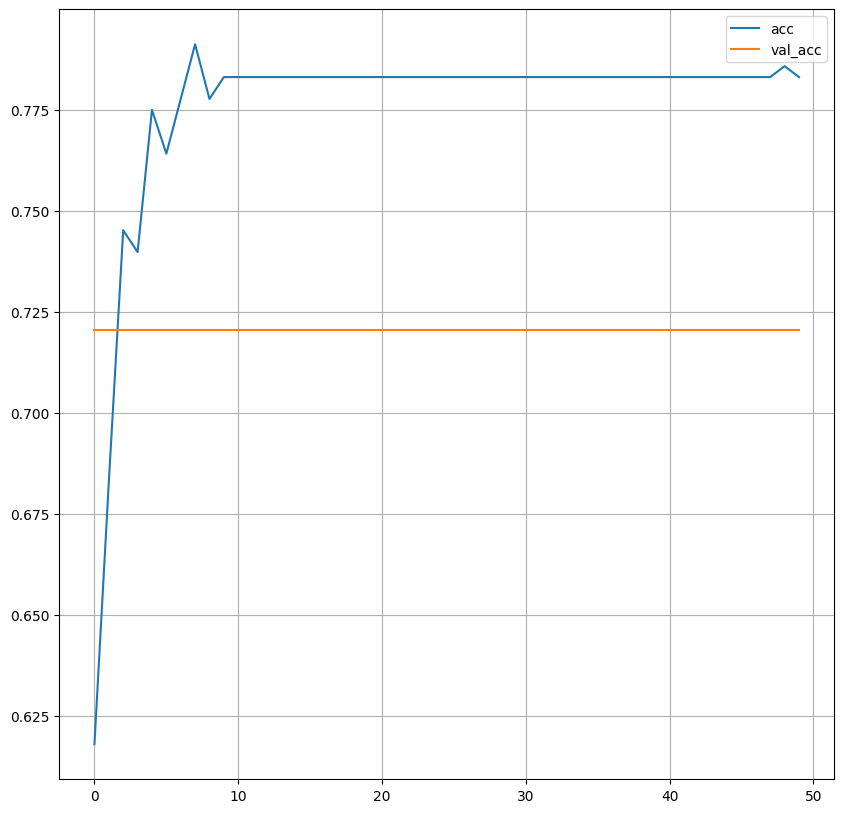

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7127 - loss: 0.6568 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9813380545713841
r2_score in Simulation Failt  void  for Each Blade :  0.9716192216906022
Error in Simulation Fault for Each Blade :  0.7795586780773085  --- r2_score Fault S ----  0.9625883308825138
Error in Simulation Fault T  for Each Blade :  0.7795586780773085  --- r2_score Fault T :  0.9766294467963164
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9576348145257587
r2_score in Simulation Failt  void  for Each Blade :  0.9678162250336686
Error in Simulation Fault for Each Blade :  0.04382806925029792  --- r2_score Fault S ----  0.9841558546990362
Error in Simulation Fault T  for Each Blade :  0.04382806925029792  --- r2_score Fault T :  0.9920254942957412
 ----- for each Blade Simulated ----- 
r2_s

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


Error in Simulation Fault for Each Blade :  -0.46442233373706987  --- r2_score Fault S ----  0.9899666506613165
Error in Simulation Fault T  for Each Blade :  -0.46442233373706987  --- r2_score Fault T :  0.977005779727475
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9805865650192288
r2_score in Simulation Failt  void  for Each Blade :  0.9895918852108008
Error in Simulation Fault for Each Blade :  -1.190869581087763  --- r2_score Fault S ----  0.9735590480139664
Error in Simulation Fault T  for Each Blade :  -1.190869581087763  --- r2_score Fault T :  0.9859237121586213
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9848598341202153
r2_score in Simulation Failt  void  for Each Blade :  0.9820308162101198
Error in Simulation Fault for Each Blade :  0.4036012142216723  --- r2_score Fault S ----  0.9801306119302184
Error in Simulation Fault T  for Each Blade :  0.4036012142216723  --- r2_score Fault T :

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.70      0.82       198

    accuracy                           0.70       198
   macro avg       0.50      0.35      0.41       198
weighted avg       1.00      0.70      0.82       198

accuracy Nave Bays : 0.702020202020202
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.70      0.82       198

    accuracy                           0.70       198
   macro avg       0.50      0.35      0.41       198
weighted avg       1.00      0.70      0.82       198

accuracy accuracy_random_forest  : 0.696969696969697
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - acc: 0.5402 - loss: 0.7092 - val_acc: 0.2796 - val_loss: 0.7204
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4965 - loss: 0.7002 - val_acc: 0.2796 - val_loss: 0.7029
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6434 - loss: 0.6694 - val_acc: 0.7204 - val_loss: 0.6893
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6487 - loss: 0.6563 - val_acc: 0.7204 - val_loss: 0.6774
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6769 - loss: 0.6342 - val_acc: 0.7204 - val_loss: 0.6662
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.6934 - loss: 0.6393 - val_acc: 0.7204 - val_loss: 0.6564
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7842 - loss: 0.6045 - val_acc: 0.7204 - val_loss: 0.6474
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7655 - loss: 0.6016 - val_acc: 0.7204 - val_loss: 0.6394
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.7636 - loss: 0.6010 - val_acc: 0.7

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

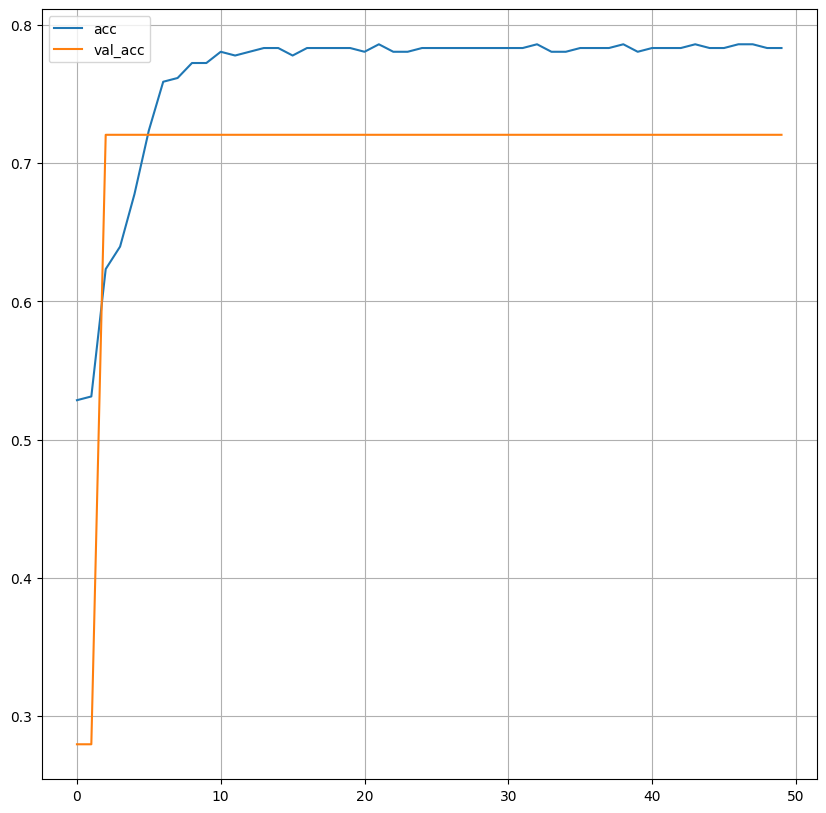

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7127 - loss: 0.6528 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9708679749073527
r2_score in Simulation Failt  void  for Each Blade :  0.9721595685625575
Error in Simulation Fault for Each Blade :  -1.3907269723487277  --- r2_score Fault S ----  0.9750748160893277
Error in Simulation Fault T  for Each Blade :  -1.3907269723487277  --- r2_score Fault T :  0.9904164797166073
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9932992757605907
r2_score in Simulation Failt  void  for Each Blade :  0.9798779968257083
Error in Simulation Fault for Each Blade :  2.261631790724219  --- r2_score Fault S ----  0.9579633091889846
Error in Simulation Fault T  for Each Blade :  2.261631790724219  --- r2_score Fault T :  0.9712878905413912
 ----- for each Blade Simulated ----- 
r2_sco

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


Error in Simulation Fault T  for Each Blade :  -0.2660338275958045  --- r2_score Fault T :  0.991104132351806
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9320900896487608
r2_score in Simulation Failt  void  for Each Blade :  0.9770889650978093
Error in Simulation Fault for Each Blade :  -1.9249055549790308  --- r2_score Fault S ----  0.9717575886386705
Error in Simulation Fault T  for Each Blade :  -1.9249055549790308  --- r2_score Fault T :  0.9883094380798728
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9558337095624907
r2_score in Simulation Failt  void  for Each Blade :  0.967326745416596
Error in Simulation Fault for Each Blade :  -0.6516289971582689  --- r2_score Fault S ----  0.9814688779641931
Error in Simulation Fault T  for Each Blade :  -0.6516289971582689  --- r2_score Fault T :  0.9719685866318254
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.02      0.33      0.03         3
         1.0       0.99      0.70      0.82       195

    accuracy                           0.70       198
   macro avg       0.50      0.52      0.43       198
weighted avg       0.97      0.70      0.81       198

accuracy accuracy_random_forest  : 0.702020202020202
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - acc: 0.3245 - loss: 0.8135 - val_acc: 0.2796 - val_loss: 0.7727
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.3298 - loss: 0.7909 - val_acc: 0.2796 - val_loss: 0.7562
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4218 - loss: 0.7586 - val_acc: 0.2796 - val_loss: 0.7406
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.4497 - loss: 0.7471 - val_acc: 0.2796 - val_loss: 0.7251
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.5412 - loss: 0.7285 - val_acc: 0.2796 - val_loss: 0.7114
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5776 - loss: 0.7152 - val_acc: 0.7204 - val_loss: 0.6985
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.6548 - loss: 0.6972 - val_acc: 0.7204 - val_loss: 0.6863
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6885 - loss: 0.6848 - val_acc: 0.7204 - val_loss: 0.6755
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7056 - loss: 0.6728 - val_acc: 0.

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

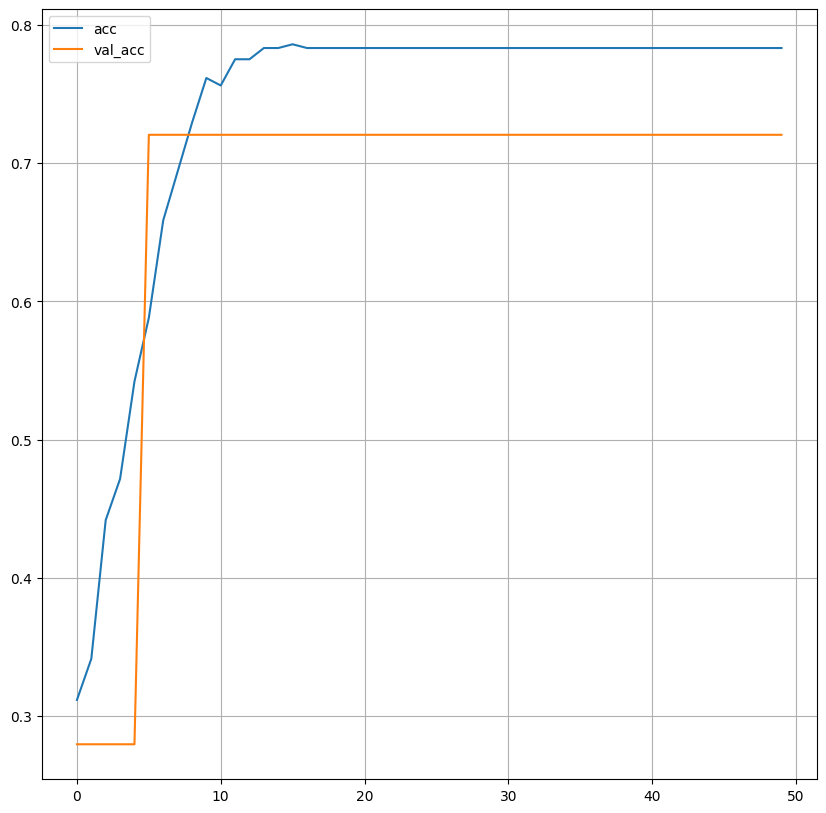

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7127 - loss: 0.6219 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9871052679147975
r2_score in Simulation Failt  void  for Each Blade :  0.9840418804421419
Error in Simulation Fault for Each Blade :  -1.4080348762420227  --- r2_score Fault S ----  0.9540888292510985
Error in Simulation Fault T  for Each Blade :  -1.4080348762420227  --- r2_score Fault T :  0.9683266154833088
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9888071853789933
r2_score in Simulation Failt  void  for Each Blade :  0.9847446544949058
Error in Simulation Fault for Each Blade :  -0.5538247214881877  --- r2_score Fault S ----  0.9873996505167559
Error in Simulation Fault T  for Each Blade :  -0.5538247214881877  --- r2_score Fault T :  0.9859602683762256
 ----- for each Blade Simulated ----- 
r2

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


r2_score in Simulation Health for Each Blade :  0.9784532795756754
r2_score in Simulation Failt  void  for Each Blade :  0.99009602334172
Error in Simulation Fault for Each Blade :  -1.9121041779491539  --- r2_score Fault S ----  0.9830536738114326
Error in Simulation Fault T  for Each Blade :  -1.9121041779491539  --- r2_score Fault T :  0.9872456196787829
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9779342019124413
r2_score in Simulation Failt  void  for Each Blade :  0.9905633141697642
Error in Simulation Fault for Each Blade :  -0.03741510004677484  --- r2_score Fault S ----  0.987270005235355
Error in Simulation Fault T  for Each Blade :  -0.03741510004677484  --- r2_score Fault T :  0.9804033721621351
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9900509256632999
r2_score in Simulation Failt  void  for Each Blade :  0.9718813214991395
Error in Simulation Fault for Each Blade :  -0.060998570674

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validati

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.70      0.82       198

    accuracy                           0.70       198
   macro avg       0.50      0.35      0.41       198
weighted avg       1.00      0.70      0.82       198

accuracy accuracy_random_forest  : 0.702020202020202
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - acc: 0.6836 - loss: 0.6715 - val_acc: 0.7204 - val_loss: 0.6905
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.7689 - loss: 0.6472 - val_acc: 0.7204 - val_loss: 0.6789
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.7661 - loss: 0.6410 - val_acc: 0.7204 - val_loss: 0.6683
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.7790 - loss: 0.6278 - val_acc: 0.7204 - val_loss: 0.6588
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7807 - loss: 0.6158 - val_acc: 0.7204 - val_loss: 0.6500
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.7902 - loss: 0.6067 - val_acc: 0.7204 - val_loss: 0.6419
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7807 - loss: 0.6023 - val_acc: 0.7204 - val_loss: 0.6348
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7551 - loss: 0.6040 - val_acc: 0.7204 - val_loss: 0.6286
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7855 - loss: 0.5874 - val_acc: 0.

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

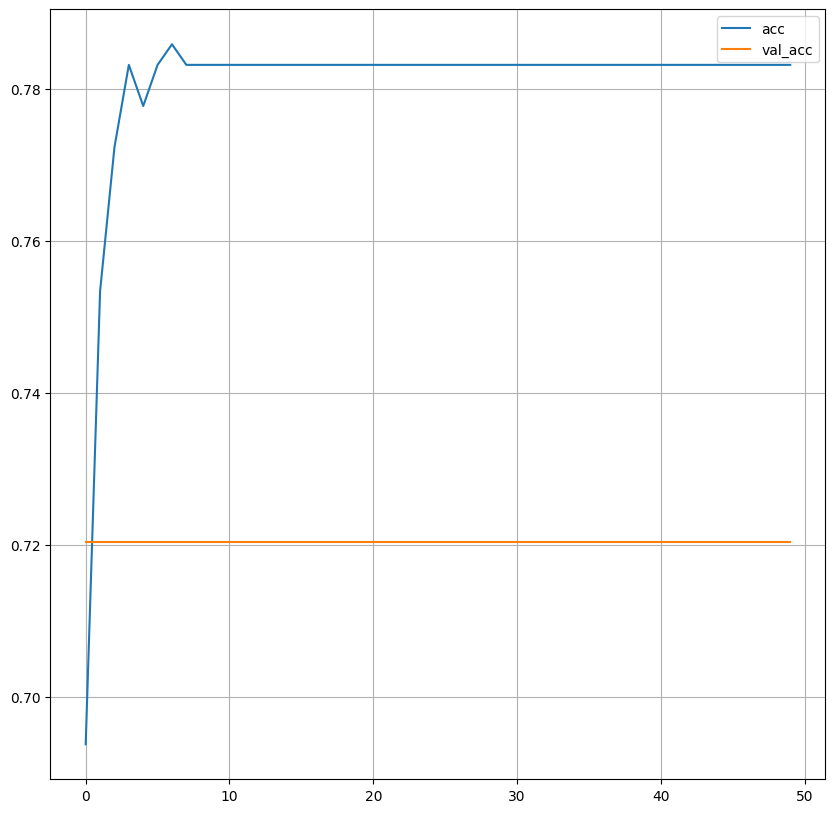

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7127 - loss: 0.6412 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9693810310450978
r2_score in Simulation Failt  void  for Each Blade :  0.9821672118449757
Error in Simulation Fault for Each Blade :  0.007939198780213985  --- r2_score Fault S ----  0.991195025984592
Error in Simulation Fault T  for Each Blade :  0.007939198780213985  --- r2_score Fault T :  0.9594356410962472
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9781158715574282
r2_score in Simulation Failt  void  for Each Blade :  0.9834349590194525
Error in Simulation Fault for Each Blade :  -2.6971647289495913  --- r2_score Fault S ----  0.9747970842047481
Error in Simulation Fault T  for Each Blade :  -2.6971647289495913  --- r2_score Fault T :  0.983866497231924
 ----- for each Blade Simulated ----- 
r2

<ipython-input-12-25fcb00d11ff>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


Error in Simulation Fault T  for Each Blade :  -0.42214947276182446  --- r2_score Fault T :  0.9677019384658612
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9679091674472512
r2_score in Simulation Failt  void  for Each Blade :  0.9808340621848983
Error in Simulation Fault for Each Blade :  -1.1028644491644477  --- r2_score Fault S ----  0.9768444960131335
Error in Simulation Fault T  for Each Blade :  -1.1028644491644477  --- r2_score Fault T :  0.9833832779102614
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9745872229144222
r2_score in Simulation Failt  void  for Each Blade :  0.989335782864653
Error in Simulation Fault for Each Blade :  1.2030446053807697  --- r2_score Fault S ----  0.9699534415433878
Error in Simulation Fault T  for Each Blade :  1.2030446053807697  --- r2_score Fault T :  0.976846883158048
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.02      0.17      0.03         6
         1.0       0.96      0.70      0.81       192

    accuracy                           0.68       198
   macro avg       0.49      0.43      0.42       198
weighted avg       0.94      0.68      0.79       198

accuracy accuracy_random_forest  : 0.7070707070707071
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - acc: 0.5496 - loss: 0.7149 - val_acc: 0.7204 - val_loss: 0.7046
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.6392 - loss: 0.6972 - val_acc: 0.7204 - val_loss: 0.6934
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.6721 - loss: 0.6867 - val_acc: 0.7204 - val_loss: 0.6814
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.7364 - loss: 0.6612 - val_acc: 0.7204 - val_loss: 0.6702
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7118 - loss: 0.6584 - val_acc: 0.7204 - val_loss: 0.6605
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7692 - loss: 0.6342 - val_acc: 0.7204 - val_loss: 0.6514
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7721 - loss: 0.6256 - val_acc: 0.7204 - val_loss: 0.6441
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.7690 - loss: 0.6250 - val_acc: 0.7204 - val_loss: 0.6380
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7445 - loss: 0.6152 - val_acc: 0.

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

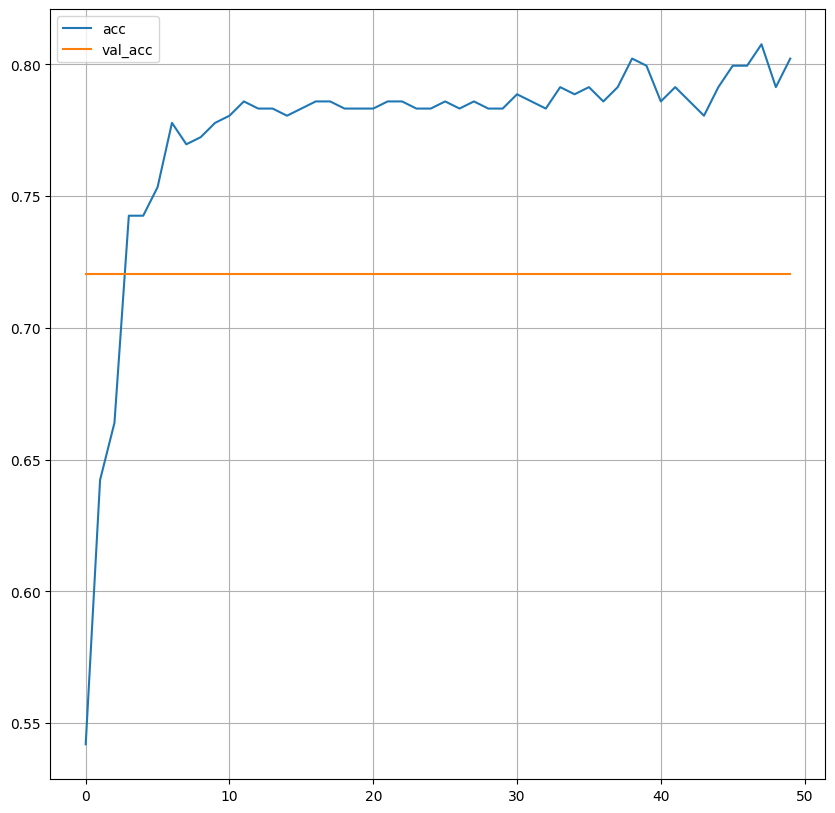

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7127 - loss: 0.6568 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 


In [12]:
for iter_alpha in total_alpha_content :
  iter_each_generate_health   = []
  iter_each_generate_health_t = []
  iter_each_generate_fault    = []
  iter_each_generate_fault_t  = []
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health   = []
    params_fault    = []
    params_fault_t  = []
    params_health_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(5):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location_combin_flap_term = 0
          select_locatiom_flap = 0

          total_health_iter  = []
          total_health_iter_t = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []
          new_data_simulated_health_t = []



          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              z_flap_health = z_sample_new


              if select_location_combin_flap_term  == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add


              if select_locatiom_flap == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flap_health = z_sample_new + Flat_Add







              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])
              new_data_simulated_health_t.append([x_sample , y_sample , z_flap_health ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])
              total_health_iter_t.append([x_sample , y_sample , z_flap_health ])



          # fig = plt.figure(figsize=(20 , 10 ))

          # ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          # ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          # ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
          # ax3 = fig.add_subplot(1 , 6 , 4 , projection='3d' )
          # ax4 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
          # ax5 = fig.add_subplot(1 , 6 , 6 , projection='3d' )

          # ax6 = fig.add_subplot(3 , 6 , 1 )
          # ax7 = fig.add_subplot(3 , 6 , 2 )
          # ax8 = fig.add_subplot(3 , 6 , 3 )

          # # ax3 = fig.add_subplot(1 , 6 , 4 )
          # # ax4 = fig.add_subplot(1 , 6 , 5 )
          # # ax5 = fig.add_subplot(1 , 6 , 6 )






          # total_health_iter = np.array(total_health_iter)
          # total_health_iter = np.array(total_health_iter)
          # total_fault_iter = np.array(total_fault_iter)
          # total_fault_t_iter = np.array(total_fault_t_iter)
          # total_health_iter_t = np.array(total_health_iter_t)
          # print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")

          # ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='health' , c = 'r'   )
          # ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='fault_alpha' ,  c = 'b' )
          # ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='blue', s = 30     )
          # ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red' , s = 30 )
          # ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red'  , s = 30  )

          # ax3.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='fault_void' , c ='blue'  )
          # ax3.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1]  , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='red' )
          # ax3.set_xlabel("axis x ")
          # ax3.set_ylabel("axis y ")

          # ax4.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='health' , c ='blue',  )
          # ax4.scatter3D(total_fault_t_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha+ void ' , c='red' ,  )
          # ax4.set_xlabel("axis x")
          # ax4.set_ylabel("axis y")

          # ax5.scatter3D(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='health' , c ='blue' ,  )
          # ax5.scatter3D(total_health_iter_t[: , 0 ] , total_health_iter_t[: , 1] , total_fault_t_iter[: , 2 ]  , label='fault_void' , c='red' ,  )
          # ax5.set_xlabel("axis x ")
          # ax5.set_ylabel("axis y ")

          # ax6.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 ,  )
          # ax6.scatter(total_health_iter_t[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_void' , c='r' , s = 30 ,  )
          # ax6.set_xlabel("axis  x ")
          # ax6.set_ylabel("axis  y ")
          # ax6.set_title(f"alpha : {iter_alpha} , void : {iter_flat/10} , location : {locate}")

          # ax7.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.5 )
          # ax7.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='r' , s = 30  )
          # ax7.set_xlabel("axis  x ")
          # ax7.set_ylabel("axis  y ")

          # ax8.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_alpha' , c='b' , )
          # ax8.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='Fault_alpha + void' , c='r')
          # ax8.set_xlabel("axis  x ")
          # ax8.set_ylabel("axis  y ")


          # ax0.legend()
          # ax0.grid()
          # ax0
          # ax1.legend()
          # ax1.grid()
          # ax2.legend()
          # ax2.grid()
          # ax3.legend()
          # ax3.grid()

          # ax4.legend()
          # ax4.grid()
          # ax5.legend()
          # ax5.grid()


          # ax6.legend()
          # ax6.grid()

          # ax7.legend()
          # ax7.grid()
          # ax8.legend()
          # ax8.grid()

          # plt.show()




          new_data_simulated_         = np.array(new_data_simulated_)
          new_data_simulated_fault    = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t  = np.array(new_data_simulated_fault_t)
          new_data_simulated_health_t = np.array(new_data_simulated_health_t)

          total_noew_for_generate.append( new_data_simulated_ )
          total_noew_for_fault1.append(new_data_simulated_health_t)
          total_noew_for_fault2.append(new_data_simulated_fault)
          total_noew_for_fault3.append(new_data_simulated_fault_t)
          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error_health = 0
          for_iter_X_health = []
          for_iter_Y_health = []
          for i in range(len(df_health['X_'])):

            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error_health += error
            for_iter_X_health.append(df_health.loc[ i , 'X_' ]  )
            for_iter_Y_health.append(df_health.loc[i , 'Y_' ])

          iter_each_generate_health.append([for_iter_X_health ,for_iter_Y_health , total_new_generate ]  )
          for_each_generate_health.append([for_iter_X_health , total_new_generate ] )
          print("r2_score in Simulation Health for Each Blade : " , r2_score(z_predict, z_test) )

          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          plt.figure(figsize = (10 , 10 ))

          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]


          # ---- setup for class health t ----

          df_health_t = pd.DataFrame()
          df_health_t['X_'] = new_data_simulated_health_t[:, 0]
          df_health_t['Y_'] = new_data_simulated_health_t[:, 1]
          df_health_t['Z_'] = new_data_simulated_health_t[:, 2]

          poly_health_t = PolynomialFeatures(degree=2)
          x_poly_health_t = poly_health_t.fit_transform(df_health_t[['X_', 'Y_']])
          scaler_health_t = StandardScaler()
          df_stander_health_t = pd.DataFrame(scaler_health_t.fit_transform(x_poly_health_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_health_t['Z_'] = df_health_t['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander_health_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model_health_t = LinearRegression()
          model_health_t.fit(x_train, z_train)
          z_predict_health_t = model_health_t.predict(x_test)
          intercept_0 = model_health_t.intercept_
          coef1 = model_health_t.coef_[0]
          coef2 = model_health_t.coef_[1]
          coef3 = model_health_t.coef_[2]
          coef4 = model_health_t.coef_[3]
          coef5 = model_health_t.coef_[4]
          coef6 = model_health_t.coef_[5]
          for_iter_X_health_t = []
          for_iter_Y_health_t = []
          total_new_generate_health_t = []
          total_error_health_t = 0

          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander_health_t.iloc[i, 0] + coef2 * df_stander_health_t.iloc[i, 1] + coef3 * df_stander_health_t.iloc[i, 2] + coef4 * df_stander_health_t.iloc[i, 3] + coef5 * df_stander_health_t.iloc[i, 4]
            + coef6 * df_stander_health_t.iloc[i, 5]
            total_new_generate_health_t.append(new_value)
            error = df_stander_health_t.iloc[i, -1] - new_value
            total_error_health_t += error
            for_iter_X_health_t.append(df_health_t.loc[ i , 'X_' ])
            for_iter_Y_health_t.append(df_health_t.loc[i , 'Y_'  ])

          iter_each_generate_health_t.append([for_iter_X_health_t , for_iter_Y_health_t ,  total_new_generate_health_t ])
          for_each_generate_health_t.append([ for_iter_X_health_t , total_new_generate_health_t ])


          print("r2_score in Simulation Failt  void  for Each Blade : " , r2_score(z_predict_health_t, z_test) )

          #class health == 0
          params_health_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_health_t, z_test),locate , 1 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]





          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = 0
          for_iter_X_fault = []
          for_iter_Y_fault = []
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault += error_Fault

            for_iter_X_fault.append(df_fault.loc[ i , 'X_' ] )
            for_iter_Y_fault.append(df_fault.loc[ i , 'Y_' ] )

          iter_each_generate_fault.append([for_iter_X_fault , for_iter_Y_fault , total_new_generate_fault  ])
          for_each_generate_fault.append([ for_iter_X_fault , total_new_generate_fault])
          print("Error in Simulation Fault for Each Blade : " , total_error_fault  , " --- r2_score Fault S ---- " ,  r2_score(z_predict_fault, z_test_fault))


          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault, z_test_fault),locate ,  1 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault_t = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = 0
          for_iter_X_fault_t = []
          for_iter_Y_fault_t = []
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault_t += error_Fault
            for_iter_X_fault_t.append(df_fault_t.loc[i , 'X_'])
            for_iter_Y_fault_t.append(df_fault_t.loc[i , 'Y_'])
          iter_each_generate_fault_t.append([for_iter_X_fault_t ,for_iter_Y_fault_t , total_new_generate_fault_t ])
          for_each_generate_fault_t.append([for_iter_X_fault_t , total_new_generate_fault_t ])
          print("Error in Simulation Fault T  for Each Blade : " , total_error_fault , " --- r2_score Fault T : " ,  r2_score(z_predict_fault_t, z_test_fault_t)   )



          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault_t, z_test_fault_t),locate ,  1 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          print(" ----- for each Blade Simulated ----- " )



#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_bias'].append(df_params['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_bias'].append(df_params['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_0'].append(df_params['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_0'].append(df_params['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_1'].append(df_params['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_1'].append(df_params['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_2'].append(df_params['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_2'].append(df_params['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_3'].append(df_params['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_3'].append(df_params['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_4'].append(df_params['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_4'].append(df_params['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_5'].append(df_params['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_5'].append(df_params['betha_5'].std())

    # -------------------------------------------------------------------------------------------

    params_health_t = np.array(params_health_t)
    df_params_health_t = pd.DataFrame({'bias':params_health_t[: , 0 ] , 'betha_0':params_health_t[ : , 1 ] , 'betha_1':params_health_t[ : , 2 ] , 'betha_2':params_health_t[ : , 3 ] ,  'betha_3':params_health_t[ : , 4 ] , 'betha_4':params_health_t[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health_t[ : , 7 ]  ,
                          'locate' : params_health_t[: , 8 ].astype(int)   , 'class' :params_health_t[: , 9 ] ,
                              'alpha' :params_health_t[: , 10 ] , 'flap' : params_health_t[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_bias'].append(df_params_health_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_bias'].append(df_params_health_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_0'].append(df_params_health_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_0'].append(df_params_health_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_1'].append(df_params_health_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_1'].append(df_params_health_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_2'].append(df_params_health_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_2'].append(df_params_health_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_3'].append(df_params_health_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_3'].append(df_params_health_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_4'].append(df_params_health_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_4'].append(df_params_health_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_5'].append(df_params_health_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_5'].append(df_params_health_t['betha_5'].std())





    # --------------------------------------------------------------------------------------------
    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'R2' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_bias'].append(df_params_fault['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_bias'].append(df_params_fault['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_0'].append(df_params_fault['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_0'].append(df_params_fault['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_1'].append(df_params_fault['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_1'].append(df_params_fault['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_2'].append(df_params_fault['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_2'].append(df_params_fault['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_3'].append(df_params_fault['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_3'].append(df_params_fault['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_4'].append(df_params_fault['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_4'].append(df_params_fault['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_5'].append(df_params_fault['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_5'].append(df_params_fault['betha_5'].std())




    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'R2' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )


    # check_columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]
    # for element in check_columns :
    #   fig = plt.figure(figsize = (10 , 10 ))
    #   ax0 = fig.add_subplot(111 )
    #   sns.kdeplot( df_params[element]  , label=f'mean_health - {element} coef'  , shade=True )
    #   sns.kdeplot(df_params_fault[element] , label=f'mean_fault_alpha - {element} coef '  , shade=True  )
    #   sns.kdeplot(df_params_fault_t[element] , label=f'mean_fault-alpha + void- {element} coef ' ,  shade=True  )
    #   sns.kdeplot(df_params_health_t[element] , label=f'mean_fault-void- {element} coef ' ,  shade=True  )
    #   plt.legend()
    #   plt.title(f"For This  alpha : {iter_alpha} and void : {iter_flat / 10 }  ")
    #   plt.grid()
    #   plt.show()



    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_bias'].append(df_params_fault_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_bias'].append(df_params_fault_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_0'].append(df_params_fault_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_0'].append(df_params_fault_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_1'].append(df_params_fault_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_1'].append(df_params_fault_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_2'].append(df_params_fault_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_2'].append(df_params_fault_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_3'].append(df_params_fault_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_3'].append(df_params_fault_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_4'].append(df_params_fault_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_4'].append(df_params_fault_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_5'].append(df_params_fault_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_5'].append(df_params_fault_t['betha_5'].std())



    concat_2_df_health_fault = pd.concat([df_params , df_params_health_t , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.3  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(classification_report(pre_nb ,y_u_test ) )
    # plt.figure(figsize = (5 ,5 ))
    # cm = confusion_matrix(pre_nb ,y_u_test , normalize='pred')
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    # disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    # plt.title("Nave Bays Confusion Matrix ")
    # plt.show()
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)


    # ---------------------------------------------------------
    rfc=RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6],
        'criterion' :['gini', 'entropy']
    }

    CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
    CV_rfc.fit(x_u_train, y_u_train)
    best_params_for_random_forest = CV_rfc.best_params_
    pre_random = CV_rfc.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(classification_report(pre_nb ,y_u_test ) )
    # plt.figure(figsize = (5 , 5 ))
    # cm = confusion_matrix(pre_random ,y_u_test , normalize='pred')
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    # disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    # plt.title("Random Forest Confusion Matrix ")
    # plt.show()
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
    total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
    total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
    total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])


    # ---------------------------------------------------------
    extra_classifier = ExtraTreesClassifier()
    extra_classifier.fit(x_u_train , y_u_train )
    predict_extra = extra_classifier.predict(x_u_test)
    total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

    # --------------------------------------------------------
    param_grid = {'C':[1,10],'gamma':[1,0.1,0], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(x_u_train, y_u_train)
    best_params_for_svc = grid.best_params_
    model_svc = SVC()
    svc_predict = grid.predict(x_u_test)
    accuracy_svc = accuracy_score(svc_predict ,y_u_test )
    # plt.figure(figsize = (5 , 5 ))
    # cm = confusion_matrix(svc_predict ,y_u_test, normalize='pred')
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    # disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    # plt.title("SVM(SVC) Confusion Matrix ")
    # plt.show()
    total_simulation['accuracy_svc_'].append(accuracy_svc)
    total_simulation['C_svc'].append(best_params_for_svc['C'])
    total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
    total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


    # ----------------------------------------------------------







    new_y_u_train_cat = to_categorical(y_u_train , 2 )
    new_y_u_test_cat  = to_categorical(y_u_test , 2 )

    model_learning = Sequential([
        Dense(256 , activation='sigmoid' , input_shape = x_u_train.shape[1 : ] ) ,
        BatchNormalization() ,
        Dropout(0.2) ,
        Dense(128 , activation='sigmoid' ,  ) ,
        BatchNormalization() ,
        Dropout(0.2) ,
        Dense(56 , activation='sigmoid' ,  ) ,
        BatchNormalization() ,
        Dropout(0.2) ,
        Dense(32 , activation='sigmoid' ,  ) ,
        BatchNormalization() ,
        Dropout(0.2) ,
        Dense(10 , activation= 'sigmoid' ) ,
        Dense(2 , activation='softmax' ) ,
    ])

    model_learning.compile('adam' , loss = 'binary_crossentropy' , metrics = ['acc' ] )
    model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , batch_size= 50  , epochs = 50 , validation_split = 0.2  )
    plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
    plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
    plt.legend()
    plt.grid()
    plt.show()

    total_simulation['ann'].append(model_learning.evaluate(x_u_test , new_y_u_test_cat)[1])

    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")




  # fig = plt.figure(figsize = (12 , 5 ))
  # ax1 = fig.add_subplot(1 , 4 , 1 , projection = '3d' )
  # ax2 = fig.add_subplot(1 , 4 , 2 , projection = '3d'  )
  # ax3 = fig.add_subplot(1 , 4 , 3 , projection = '3d'  )
  # ax4 = fig.add_subplot(1 , 4 , 4 , projection = '3d'  )

  # iter_each_generate_health   = np.array(iter_each_generate_health)
  # iter_each_generate_health_t = np.array(iter_each_generate_health_t)
  # iter_each_generate_fault    = np.array(iter_each_generate_fault)
  # iter_each_generate_fault_t  = np.array(iter_each_generate_fault_t)


  # ax1.scatter3D(iter_each_generate_health[ : , 0]   , iter_each_generate_health[ : , 1] , iter_each_generate_health[ : , 2 ] , label = 'health'  )
  # ax2.scatter3D(iter_each_generate_health_t[ : , 0] , iter_each_generate_health[: , 1] ,  iter_each_generate_health_t[ : , 2 ] , label = 'fault void'  )
  # ax3.scatter3D(iter_each_generate_fault[ : , 0]    , iter_each_generate_health[: , 1] , iter_each_generate_fault[ : , 2 ] , label = 'fault alpha '  )
  # ax4.scatter3D(iter_each_generate_fault_t[ : , 0]  , iter_each_generate_health[: , 1 ] , iter_each_generate_fault_t[ : , 2 ] , label = 'fault alpha + void '  )

  # ax1.grid()
  # ax1.set_title(" health data ")

  # ax2.grid()
  # ax2.set_title("fault void ")

  # ax3.grid()
  # ax3.set_title("fault alpha ")

  # ax4.grid()
  # ax4.set_title("alpha + void ")
  # plt.show()

  # fig1 = plt.figure(figsize = (12 , 8 ))

  # ax5 = fig1.add_subplot(4 , 4 , 1   )
  # ax6 = fig1.add_subplot(4 , 4 , 2   )
  # ax7 = fig1.add_subplot(4 , 4 , 3   )
  # ax8 = fig1.add_subplot(4 , 4 , 4   )

  # ax5.scatter(iter_each_generate_health[ : , 0] , iter_each_generate_health[ : , 2 ] , label = 'health' , c='r' )
  # ax6.scatter(iter_each_generate_health_t[ : , 0] , iter_each_generate_health_t[ : , 2 ] , label = 'fault void' , c='aqua' )
  # ax7.scatter(iter_each_generate_fault[ : , 0] , iter_each_generate_fault[ : , 2 ] , label = 'fault alpha' , c='b')
  # ax8.scatter(iter_each_generate_fault_t[ : , 0] , iter_each_generate_fault_t[ : , 2 ] , label = 'fault alpha + void' , c='g' )

  # ax5.set_title("health data ")
  # ax5.grid()

  # ax6.set_title("fault void ")
  # ax6.grid()

  # ax7.set_title(f"fault alpha alpha : {iter_alpha}")
  # ax7.grid()

  # ax8.set_title(f"fault alpha  + void : {iter_alpha} ")
  # ax8.grid()


  # plt.show()

  # fig2 = plt.figure(figsize = (12 , 8 ))
  # ax9  = fig2.add_subplot(4 , 4 , 1   )
  # ax10 = fig2.add_subplot(4 , 4 , 2   )
  # ax11 = fig2.add_subplot(4 , 4 , 3   )
  # ax12 = fig2.add_subplot(4 , 4 , 4   )

  # ax9.scatter(iter_each_generate_health[ : , 0] , iter_each_generate_health[ : , 1 ] , label = 'health' , c='r' )
  # ax10.scatter(iter_each_generate_health_t[ : , 0] , iter_each_generate_health_t[ : , 1 ] , label = 'fault void' , c='aqua' )
  # ax11.scatter(iter_each_generate_fault[ : , 0] , iter_each_generate_fault[ : , 1 ] , label = 'fault alpha' , c='b')
  # ax12.scatter(iter_each_generate_fault_t[ : , 0] , iter_each_generate_fault_t[ : , 1 ] , label = 'fault alpha + void' , c='g' )


  # ax9.set_title("health data ")
  # ax9.grid()

  # ax10.set_title("fault void ")
  # ax10.grid()

  # ax11.set_title(f"fault alpha alpha : {iter_alpha}")
  # ax11.grid()

  # ax12.set_title(f"fault alpha  + void : {iter_alpha} ")
  # ax12.grid()


  # plt.show()



In [25]:
concat_2_df_health_fault['flap'] = concat_2_df_health_fault['flap'] / 10

In [27]:
concat_2_df_health_fault.sample(15)

bias  betha_0   betha_1   betha_2   betha_3   betha_4   betha_5  \
127  1.455498      0.0 -1.136842  0.017996  2.648865 -0.003536 -0.004859   
129  1.473975      0.0 -1.091299  0.011079  2.621061  0.113894  0.110007   
58   1.664065      0.0 -0.888843 -0.139797  2.554694  0.097550 -0.188304   
17   2.069348      0.0 -0.819571 -0.169386  2.772642  0.111637  0.190539   
20   2.098764      0.0 -1.135784 -0.139795  3.146559  0.087810 -0.085161   
12   2.045836      0.0 -0.919268 -0.100568  2.733715 -0.220469 -0.247142   
103  1.750575      0.0 -1.643737  0.190636  3.359540 -0.140207  0.113691   
130  1.428896      0.0 -1.195637 -0.152701  2.730662  0.148099 -0.063448   
142  1.437621      0.0 -1.044438 -0.130957  2.493152 -0.065757 -0.171926   
88   1.651596      0.0 -0.975157 -0.084608  2.637668  0.068760 -0.038992   
24   2.108852      0.0 -0.968512 -0.128206  2.951560  0.055371 -0.120222   
7    2.075569      0.0 -1.102083 -0.190529  3.137708  0.227432 -0.044585   
91   1.693971      0.0 -1.163555  0.113550  2.790862 -0.110248  0.044549   
75   1.695516      0.0 -1.003504  0.042199  2.700862  0.066540  0.090918   
80   1.638431      0.0 -1.191432 -0.354169  2.973040  0.379997 -0.121931   

           R2  locate  class  alpha  flap  
127  0.994691       8    1.0  0.003   0.4  
129  0.975419       8    1.0  0.003   0.4  
58   0.986434       5    1.0  0.003   0.4  
17   0.975034       8    1.0  0.003   0.4  
20   0.991761       9    1.0  0.003   0.4  
12   0.948859       7    1.0  0.003   0.4  
103  0.964755      14    1.0  0.003   0.4  
130  0.940233       9    1.0  0.003   0.4  
142  0.959213      11    1.0  0.003   0.4  
88   0.989525      11    1.0  0.003   0.4  
24   0.979270       9    1.0  0.003   0.4  
7    0.981424       6    1.0  0.003   0.4  
91   0.971853      12    1.0  0.003   0.4  
75   0.984038       9    1.0  0.003   0.4  
80   0.964281      10    0.0  0.003   0.4

In [24]:
concat_2_df_health_fault.corr()['class'].round(2)

bias       0.01
betha_0     NaN
betha_1   -0.02
betha_2   -0.03
betha_3    0.04
betha_4    0.02
betha_5   -0.02
R2         0.02
locate     0.00
class      1.00
alpha       NaN
flap        NaN
Name: class, dtype: float64

<ipython-input-20-b52b67bd962a>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


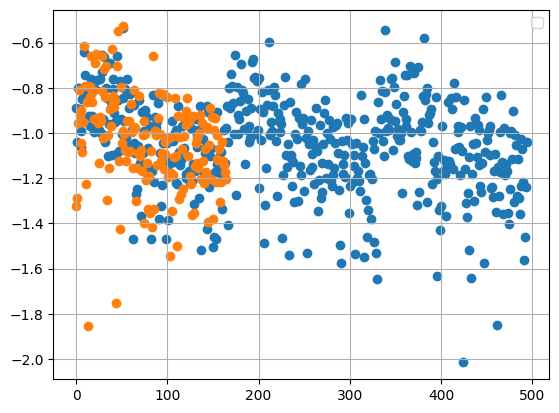

In [20]:
plt.scatter(range(len(concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1.0 ])) , concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1.0 ]['betha_1'] )
plt.scatter(range(len(concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0.0 ])) , concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0.0 ]['betha_1'] )
plt.legend()
plt.grid()
plt.show()

In [ ]:
import seaborn as sns

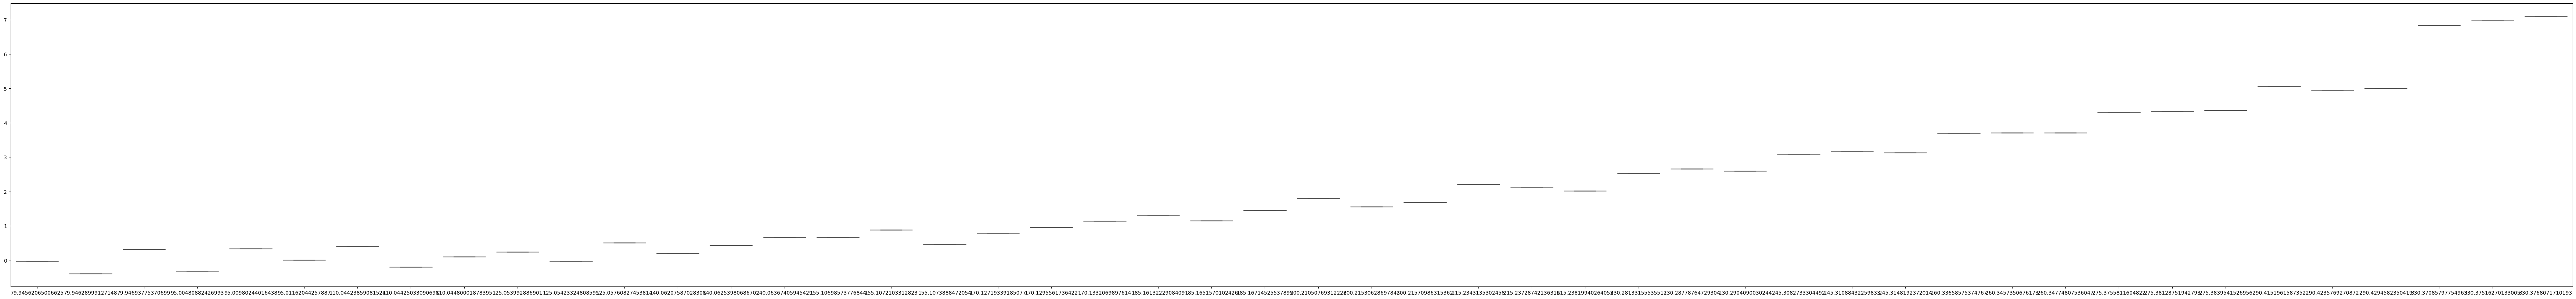

In [ ]:
plt.figure(figsize = (90 , 10 ))
sns.boxplot(x = for_each_generate_health[0][0] , y = for_each_generate_health[0][1]  )
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

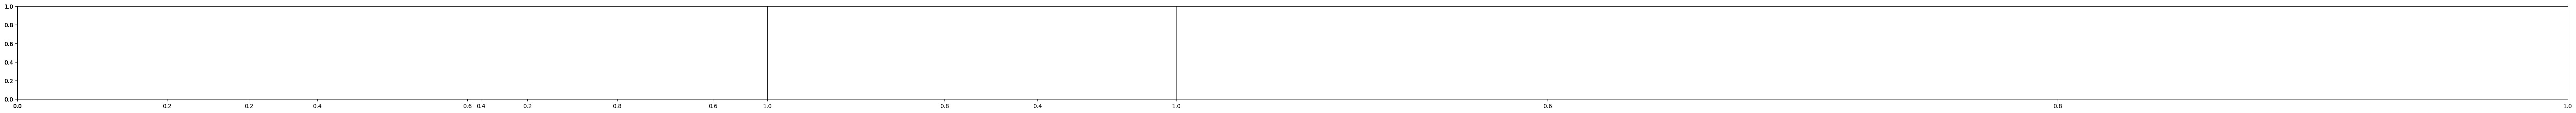

In [ ]:
fig = plt.figure(figsize = (80 , 10 ))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(321)
ax3 = fig.add_subplot(331)
for el in for_each_generate_health :
  ax1 = sns.boxplot(el[0] , el[1]  )
for e2 in for_each_generate_health_t :
  ax2 = sns.boxplot(e2[0] , e2[1] )
for e3 in for_each_generate_fault :
  ax3 = sns.boxplot(e2[0] , e2[1]  )
plt.grid()
plt.show()



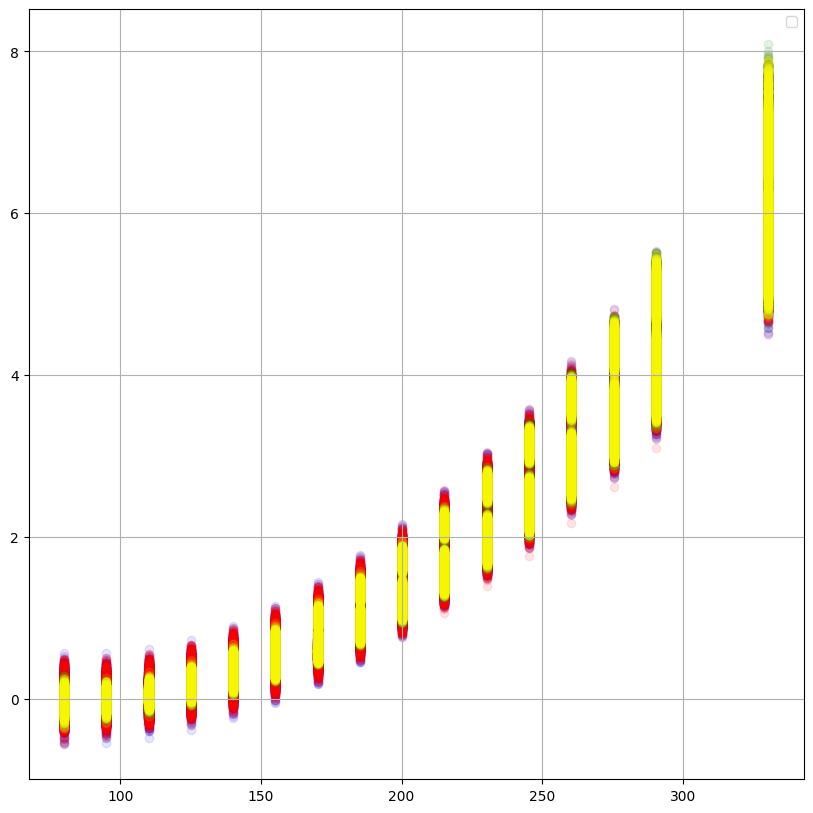

In [ ]:
plt.figure(figsize = (10 , 10 ))
for el in for_each_generate_health   :
  ax1 = plt.scatter(el[0] , el[1] , c = 'b' , alpha = 0.1 )
for el in for_each_generate_health_t :
  ax2 = plt.scatter(el[0] , el[1] , c = 'r' , alpha = 0.1 )
for e2 in for_each_generate_fault :
  ax3 = plt.scatter(e2[0] , e2[1] , c = 'g' , alpha = 0.1 )
for e3 in for_each_generate_fault_t :
  ax3 = plt.scatter(e3[0] , e3[1] , c = 'yellow' , alpha = 0.1 )

plt.legend()
plt.grid()
plt.show()






In [ ]:
df_health.loc[1 , 'X_']

79.95916471143669

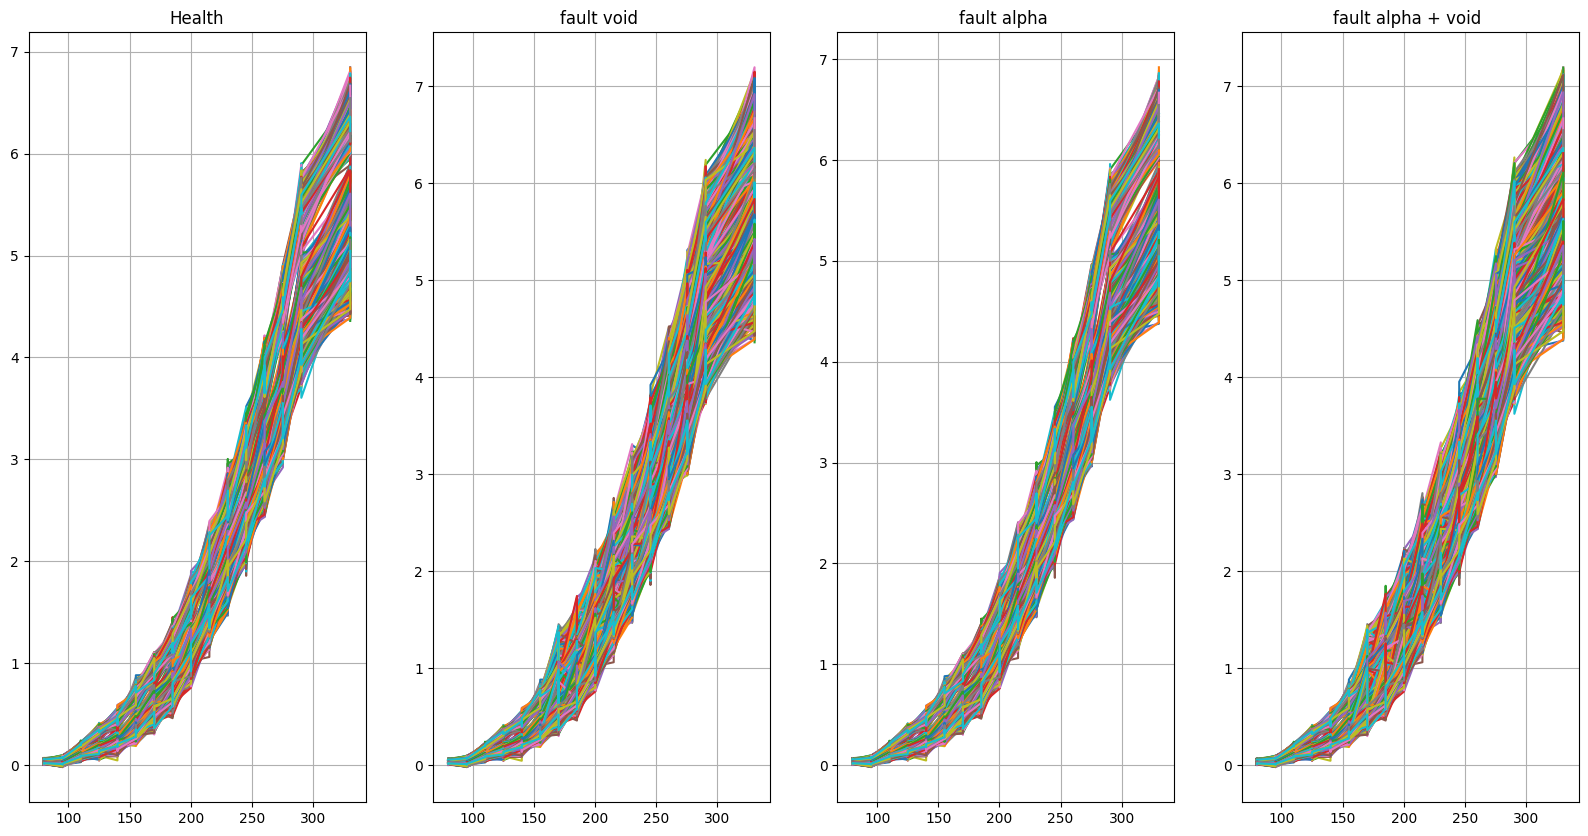

In [ ]:
fig1_1 = plt.figure(figsize = (20 , 10 ))
ax1 = fig1_1.add_subplot(1 , 4 , 1 )
ax2 = fig1_1.add_subplot(1 , 4 , 2)
ax3 = fig1_1.add_subplot(1 , 4 , 3)
ax4 = fig1_1.add_subplot(1 , 4 , 4)
for index , element in enumerate(total_noew_for_generate) :
  ax1.plot(element[ : , 0 ] , element[: , 2 ]     )
ax1.grid()
ax1.set_title("Health")


for index , element1 in enumerate(total_noew_for_fault1) :
  ax2.plot(element1[ : , 0 ] , element1[: , 2 ]     )
ax2.grid()
ax2.set_title("fault void ")


for index , element2 in enumerate(total_noew_for_fault2) :
  ax3.plot(element2[ : , 0 ] , element2[: , 2 ]     )
ax3.grid()
ax3.set_title("fault alpha ")


for index , element3 in enumerate(total_noew_for_fault3) :
  ax4.plot(element3[ : , 0 ] , element3[: , 2 ]     )
ax4.grid()
ax4.set_title("fault alpha + void ")
plt.show()

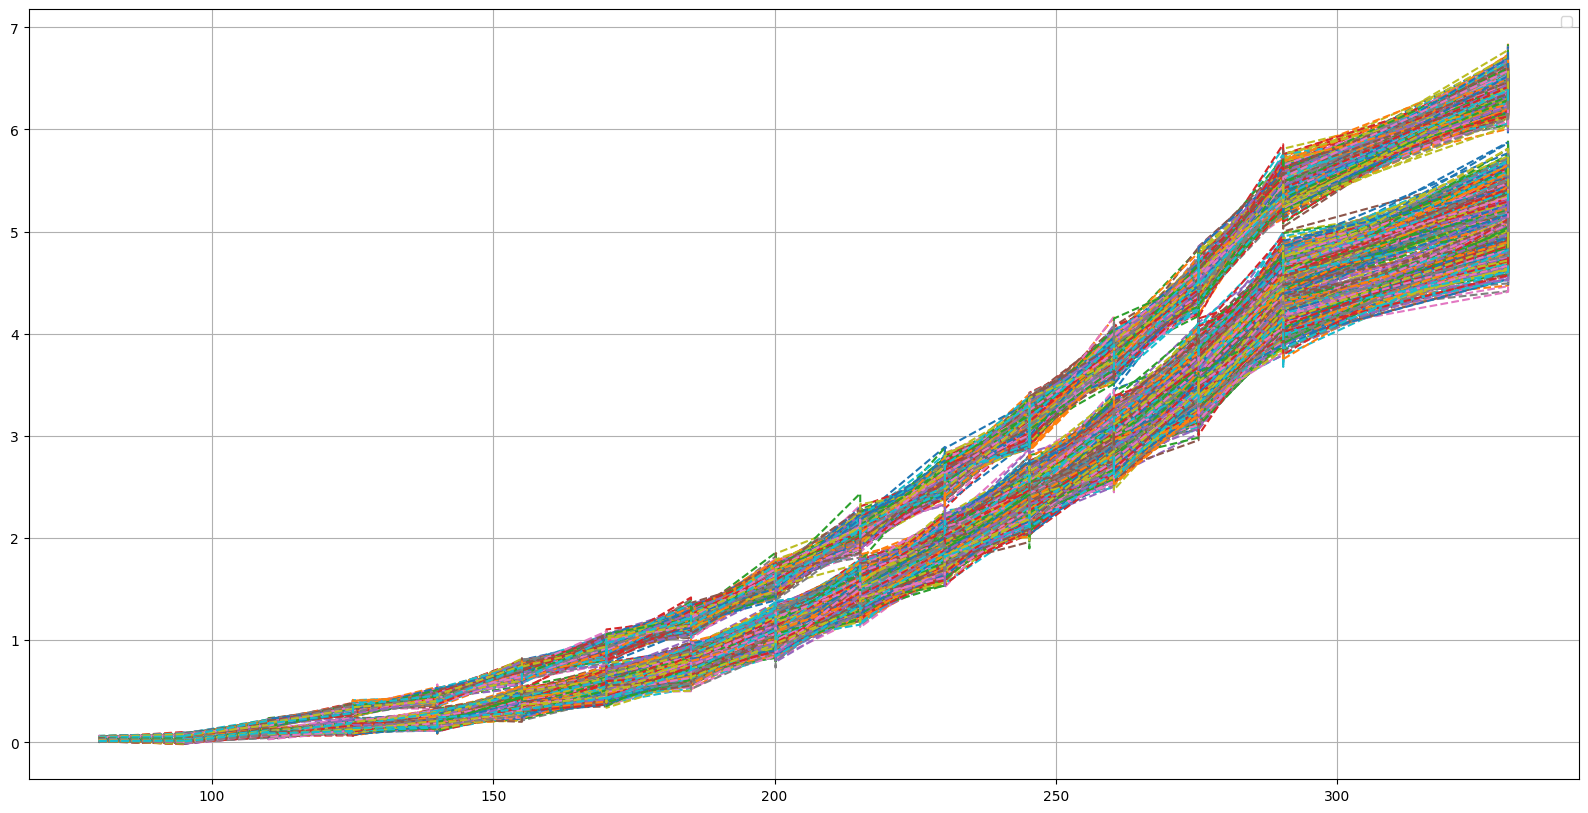

In [ ]:

fig = plt.figure(figsize=(20 , 10 ))

ax = fig.add_subplot(1 , 1, 1 )
for index , element in enumerate(total_noew_for_generate) :
  ax = plt.plot(element[ : , 0 ] , element[: , 2 ]    , ls='--' )

plt.grid()
plt.legend()
plt.show()





In [ ]:
wbapath_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH   = '/content/MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH.csv'
path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = '/content/MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T.csv'
path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T  = '/content/MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T.csv'
path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT    = '/content/MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT.csv'
path_def_result = '/content/def_result.csv'


In [ ]:

df_health_mean_and_std    = pd.read_csv(path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
df_health_t_mean_and_std  = pd.read_csv(path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
df_fault_t_mean_and_std   = pd.read_csv(path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
df_fault_mean_and_std     = pd.read_csv(path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)
df_result                 = pd.read_csv(path_def_result)

In [ ]:

df_health_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
df_health_t_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
df_fault_t_mean_and_std = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
df_fault_mean_and_std   = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)



In [ ]:
df_fault_t_mean_and_std.shape

(36, 14)

In [ ]:
check_columns = ['mean_bias' , 'mean_betha_0' , 'mean_betha_1' , 'mean_betha_2' , 'mean_betha_3' , 'mean_betha_4' , 'mean_betha_5' ]


In [ ]:
df_health_mean_and_std

mean_bias  std_bias  mean_betha_0  std_betha_0  mean_betha_1  std_betha_1  \
0    1.743990  0.262416           0.0          0.0     -1.054177     0.215903   
1    1.744767  0.259263           0.0          0.0     -1.048258     0.199191   
2    1.746981  0.261232           0.0          0.0     -1.061282     0.226071   
3    1.745516  0.261167           0.0          0.0     -1.051481     0.218872   
4    1.747410  0.259414           0.0          0.0     -1.062909     0.208531   
5    1.745228  0.262312           0.0          0.0     -1.054924     0.214211   
6    1.744835  0.261347           0.0          0.0     -1.046429     0.202090   
7    1.745433  0.263210           0.0          0.0     -1.056118     0.202042   
8    1.745758  0.260505           0.0          0.0     -1.056612     0.232011   
9    1.744246  0.258732           0.0          0.0     -1.040797     0.208790   
10   1.744891  0.261252           0.0          0.0     -1.047622     0.203290   
11   1.744108  0.261253           0.0          0.0     -1.034308     0.212393   
12   1.743445  0.260308           0.0          0.0     -1.047133     0.197381   
13   1.742959  0.259366           0.0          0.0     -1.051926     0.215723   
14   1.746576  0.259884           0.0          0.0     -1.050496     0.222644   
15   1.746801  0.261432           0.0          0.0     -1.051967     0.198868   
16   1.743859  0.260919           0.0          0.0     -1.046887     0.202900   
17   1.742812  0.260841           0.0          0.0     -1.036084     0.198010   
18   1.745297  0.260561           0.0          0.0     -1.043939     0.212549   
19   1.745852  0.261634           0.0          0.0     -1.071830     0.226635   
20   1.743057  0.262745           0.0          0.0     -1.026329     0.206515   
21   1.746096  0.258420           0.0          0.0     -1.057725     0.225588   
22   1.746316  0.261387           0.0          0.0     -1.052350     0.211086   
23   1.744432  0.261084           0.0          0.0     -1.048456     0.226564   
24   1.745078  0.262229           0.0          0.0     -1.055171     0.206085   
25   1.744401  0.259300           0.0          0.0     -1.048266     0.220831   
26   1.744981  0.262586           0.0          0.0     -1.070071     0.208366   
27   1.745633  0.261018           0.0          0.0     -1.053931     0.203675   
28   1.743914  0.260852           0.0          0.0     -1.050637     0.216887   
29   1.746120  0.262716           0.0          0.0     -1.058507     0.215441   
30   1.745549  0.260811           0.0          0.0     -1.059081     0.231799   
31   1.745035  0.262746           0.0          0.0     -1.049427     0.214198   
32   1.744622  0.261883           0.0          0.0     -1.047368     0.192346   
33   1.745542  0.261565           0.0          0.0     -1.061641     0.214634   
34   1.744966  0.259898           0.0          0.0     -1.058522     0.204834   
35   1.746743  0.262166           0.0          0.0     -1.070833     0.230038   

    mean_betha_2  std_betha_2  mean_betha_3  std_betha_3  mean_betha_4  \
0      -0.076947     0.122163      2.790758     0.264789      0.092071   
1      -0.082580     0.127783      2.788039     0.225060      0.095994   
2      -0.072434     0.124348      2.800545     0.260804      0.088031   
3      -0.089732     0.113373      2.791244     0.257380      0.092593   
4      -0.077318     0.127045      2.801770     0.249135      0.088791   
5      -0.069384     0.128754      2.788206     0.262362      0.082625   
6      -0.071276     0.127988      2.777806     0.240879      0.079204   
7      -0.071424     0.126081      2.793509     0.250770      0.089715   
8      -0.069008     0.127151      2.792146     0.267821      0.086198   
9      -0.072465     0.129456      2.775464     0.231432      0.085408   
10     -0.062840     0.121248      2.778879     0.228610      0.080077   
11     -0.069635     0.119658      2.764689     0.250014      0.080564   
12     -0.062396     0.135269      2.780609 

mean fault t :  1.7545292054330361  - mean fault :  1.75432284524475  - mean health :  1.7450902991170028


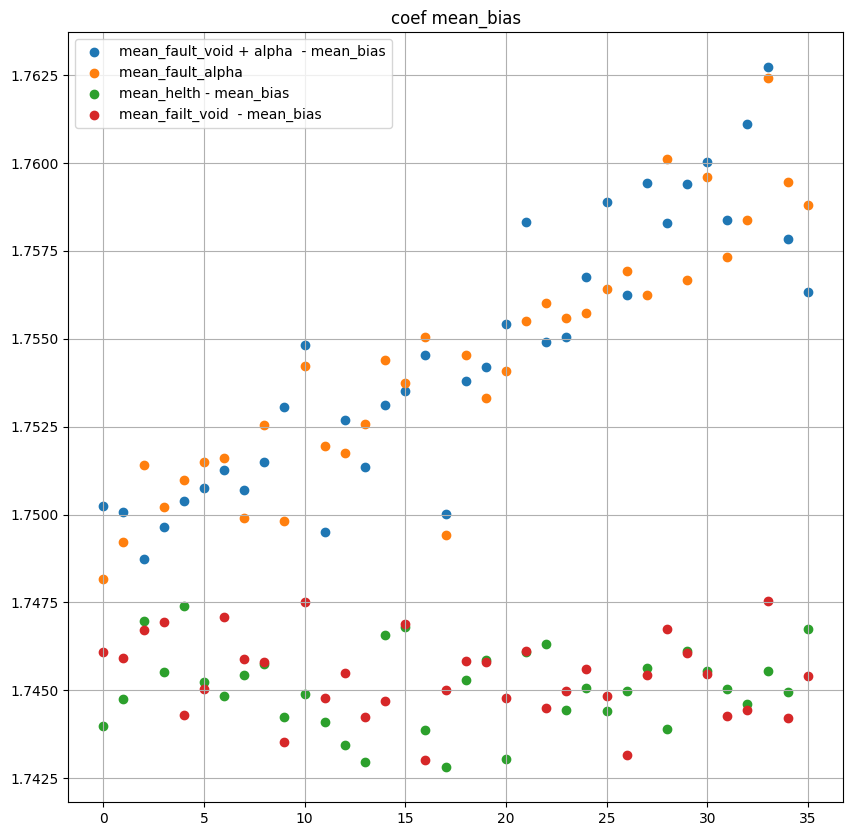

mean fault t :  0.0  - mean fault :  0.0  - mean health :  0.0


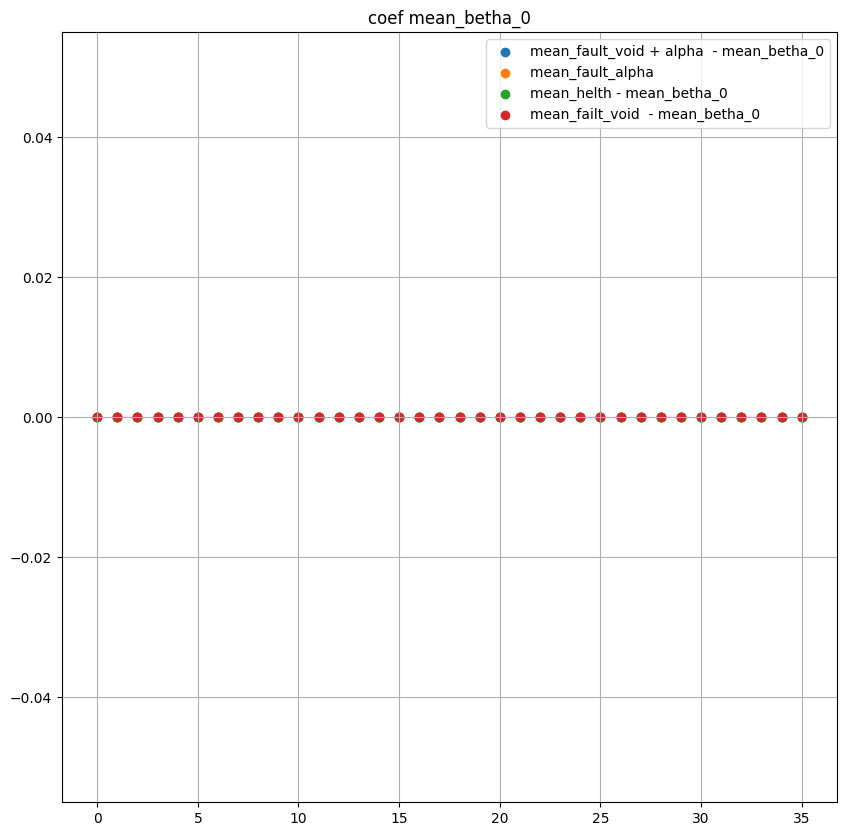

mean fault t :  -1.064104690388864  - mean fault :  -1.0649407894133562  - mean health :  -1.0523192416541698


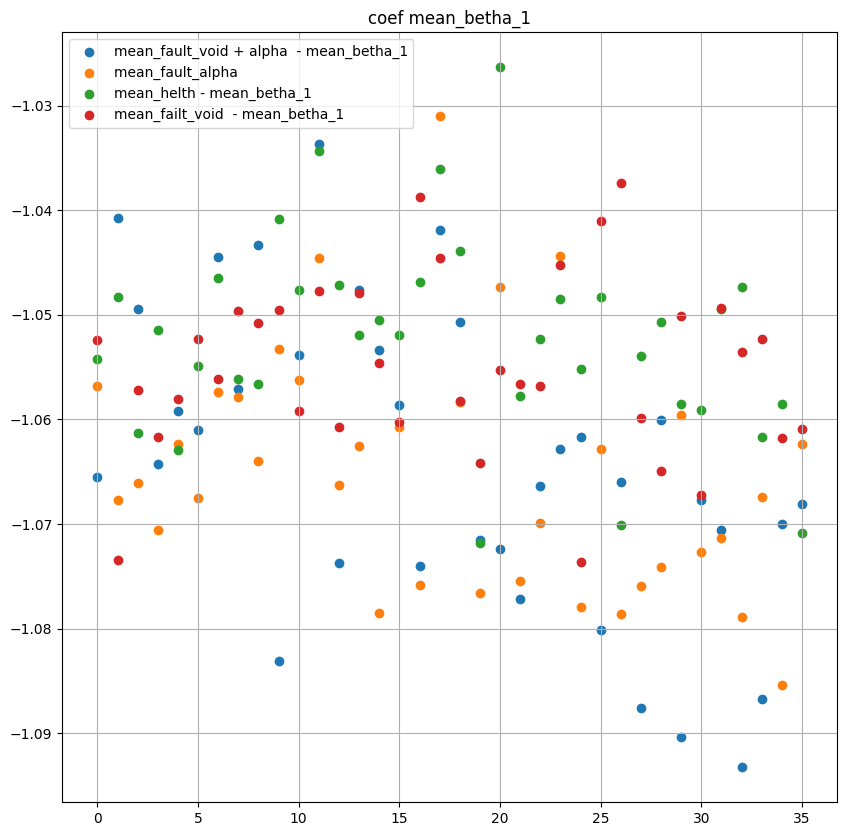

mean fault t :  -0.07420963291677661  - mean fault :  -0.07328957929188218  - mean health :  -0.07402679916464489


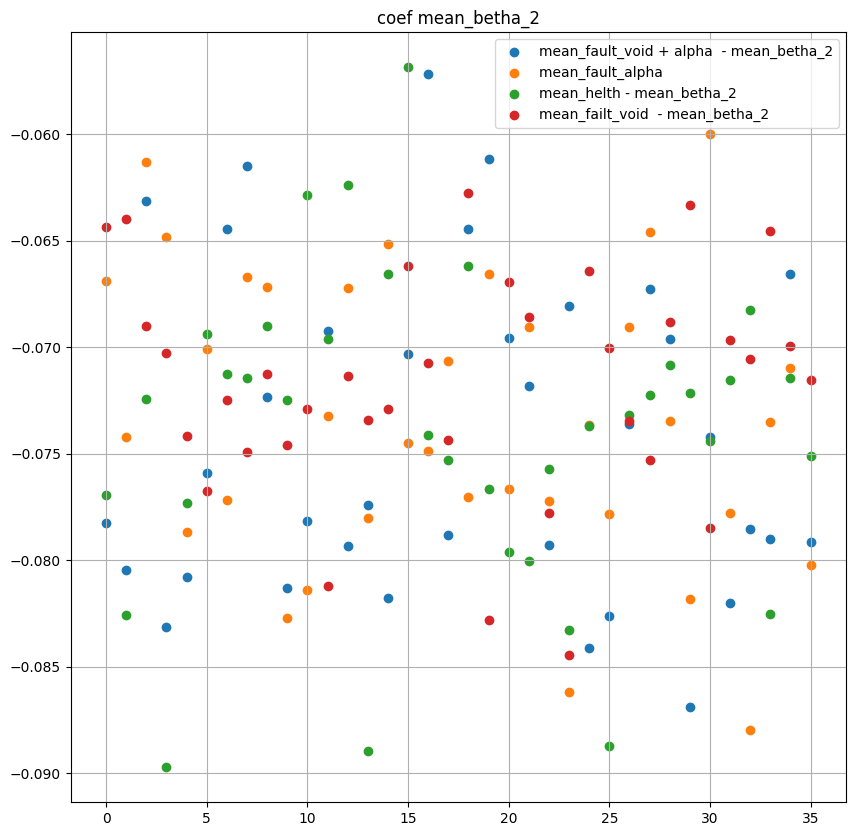

mean fault t :  2.811208812328181  - mean fault :  2.8113578684584986  - mean health :  2.788577950153987


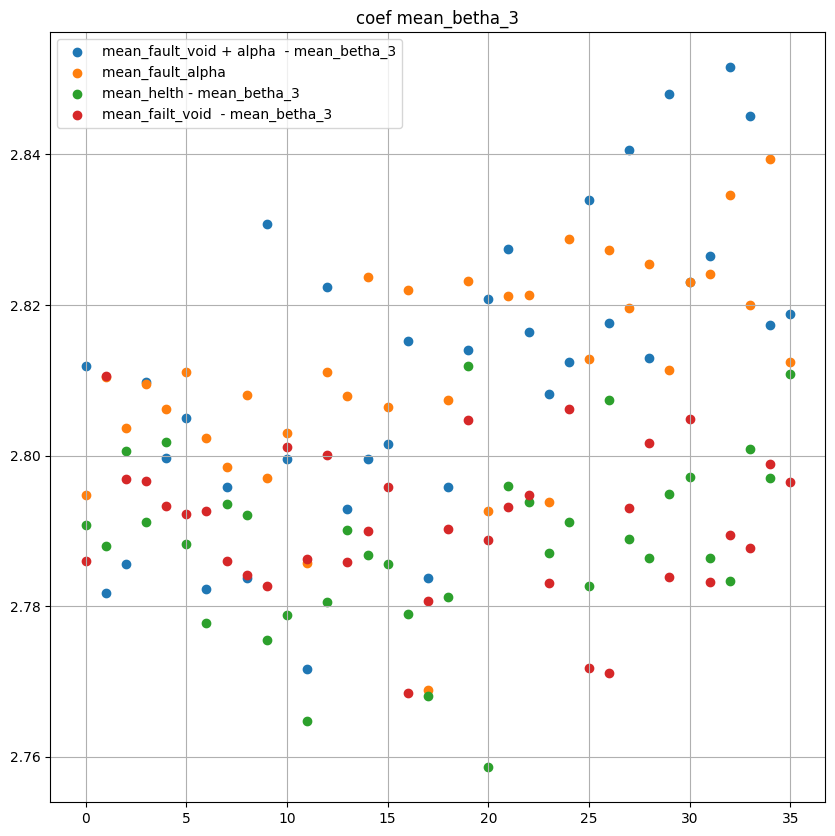

mean fault t :  0.08812816168061618  - mean fault :  0.0874781317946251  - mean health :  0.08820141461986847


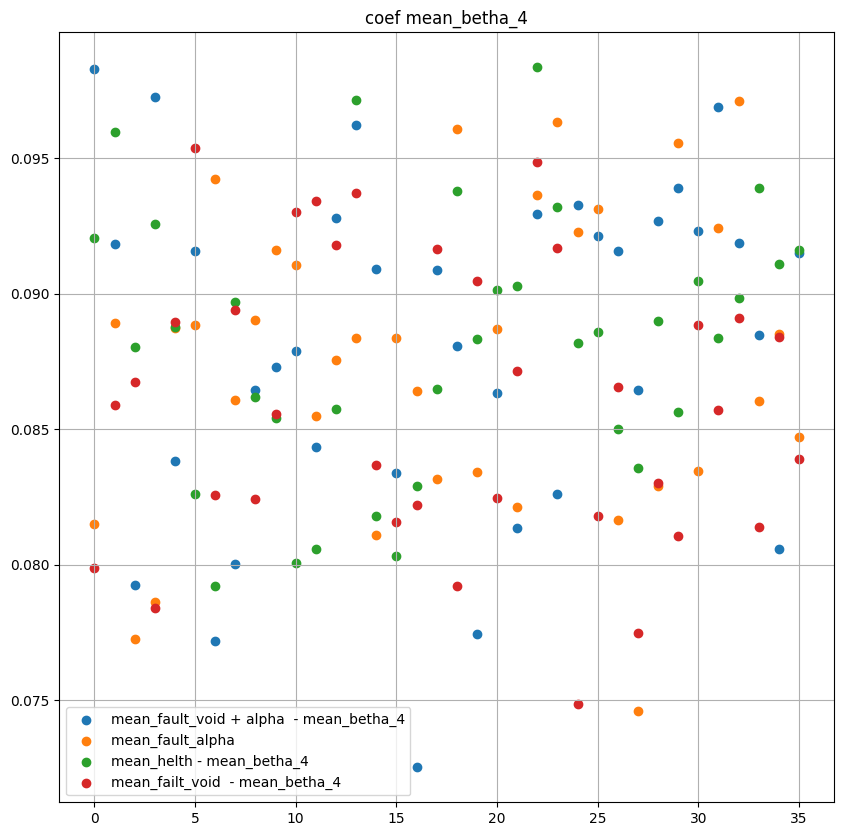

mean fault t :  -0.0157260752343937  - mean fault :  -0.015308319917712952  - mean health :  -0.015644094412882805


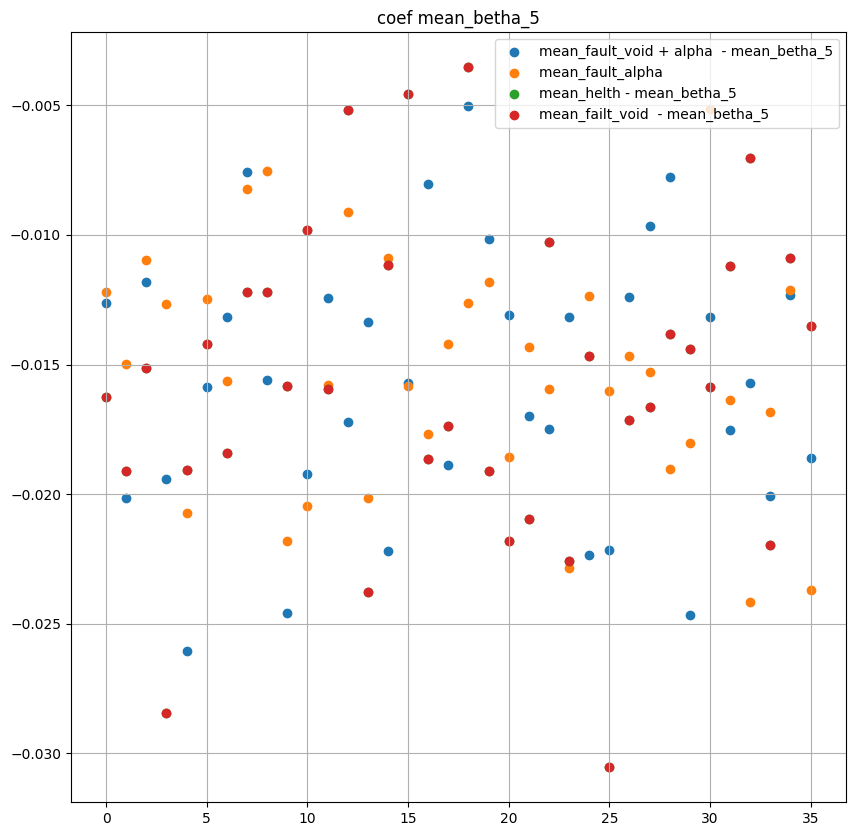

In [ ]:
for element in check_columns :
  fig = plt.figure(figsize = (10 , 10 ))
  ax0 = fig.add_subplot(111 )
  print("mean fault t : " , df_fault_t_mean_and_std[element].mean() , " - mean fault : " , df_fault_mean_and_std[element].mean() , " - mean health : " , df_health_mean_and_std[element].mean() )
  plt.scatter(range(len(df_fault_t_mean_and_std)) , df_fault_t_mean_and_std[element]   , label=f'mean_fault_void + alpha  - {element}'  )
  plt.scatter(range(len(df_fault_mean_and_std)) , df_fault_mean_and_std[element]  , label=f'mean_fault_alpha '  )
  plt.scatter(range(len(df_health_mean_and_std)) , df_health_mean_and_std[element]  , label=f'mean_helth - {element} ' )
  plt.scatter(range(len(df_health_t_mean_and_std)) , df_health_t_mean_and_std[element]  , label=f'mean_failt_void  - {element} ' )
  plt.legend()
  plt.title(f"coef {element}")
  plt.grid()
  plt.show()

In [ ]:
collect_health = []
collect_health_void = []
collect_health_fault = []
collect_health_fault_t = []

for element in check_columns :
  collect_health.append(df_health_mean_and_std[element].mean() )
  collect_health_void.append(df_health_t_mean_and_std[element].mean())
  collect_health_fault.append(df_fault_mean_and_std[element].mean())
  collect_health_fault_t.append(df_fault_t_mean_and_std[element].mean())


In [ ]:
collect_health

[1.7450902991170028,
 0.0,
 -1.0523192416541698,
 -0.07402679916464489,
 2.788577950153987,
 0.08820141461986847,
 -0.015644094412882805]

In [ ]:
## Health
z = 1.7453621418481253 + 0.0 + -1.0516916370674025 * x + -0.07278352808276344 * y +  2.788009490720446 * x^2 + 0.08763440855852632 * xy - 0.014885117240085169 * y^2

NameError: name 'x' is not defined

In [ ]:
collect_health_void

[1.7453943543098558,
 0.0,
 -1.055082913511366,
 -0.07167803216055328,
 2.790903476779856,
 0.08595394176101841,
 -0.015644094412882805]

In [ ]:
## void
z = 1.1.7452764228402338 + 0.0 + -1.0507707297043636 * x + -0.07235778963153691 * y +  2.785710364357619 * x^2 + 0.08600509217192165 * xy - 0.014885117240085169 * y^2

SyntaxError: invalid syntax (<ipython-input-74-941c4ce60c88>, line 2)

In [ ]:
collect_health_fault

[1.75432284524475,
 0.0,
 -1.0649407894133562,
 -0.07328957929188218,
 2.8113578684584986,
 0.0874781317946251,
 -0.015308319917712952]

In [ ]:
## alpha
z = 1.754870579916035 + 0.0 + -1.064653742660759 * x + -0.07291663066568127 * y +  2.812101412173339 * x^2 + 0.08829286787347411 * xy -0.014963540108912494 * y^2

NameError: name 'x' is not defined

In [ ]:
collect_health_fault_t

[1.7545292054330361,
 0.0,
 -1.064104690388864,
 -0.07420963291677661,
 2.811208812328181,
 0.08812816168061618,
 -0.0157260752343937]

In [ ]:
## alpha + void
z = 1.75501074058153 + 0.0 + -1.0658114177663764 * x + -0.06894713620264775 * y +  2.8126781508194387 * x^2 +  0.0872206164512904 * xy -0.011462886975927471 * y^2

NameError: name 'x' is not defined

mean fault t :  1.7545292054330361  - mean fault :  1.75432284524475  - mean health :  1.7450902991170028


<ipython-input-79-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-79-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-79-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-79-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

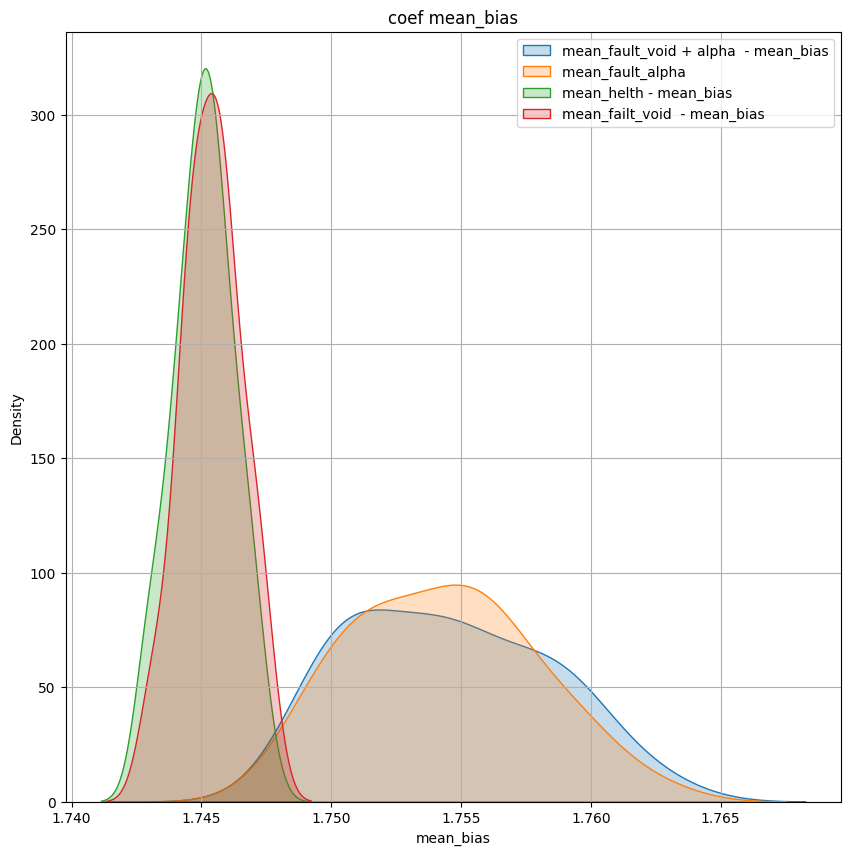

mean fault t :  0.0  - mean fault :  0.0  - mean health :  0.0


<ipython-input-79-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-79-96ead9510f57>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-79-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-79-96ead9510f57>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning

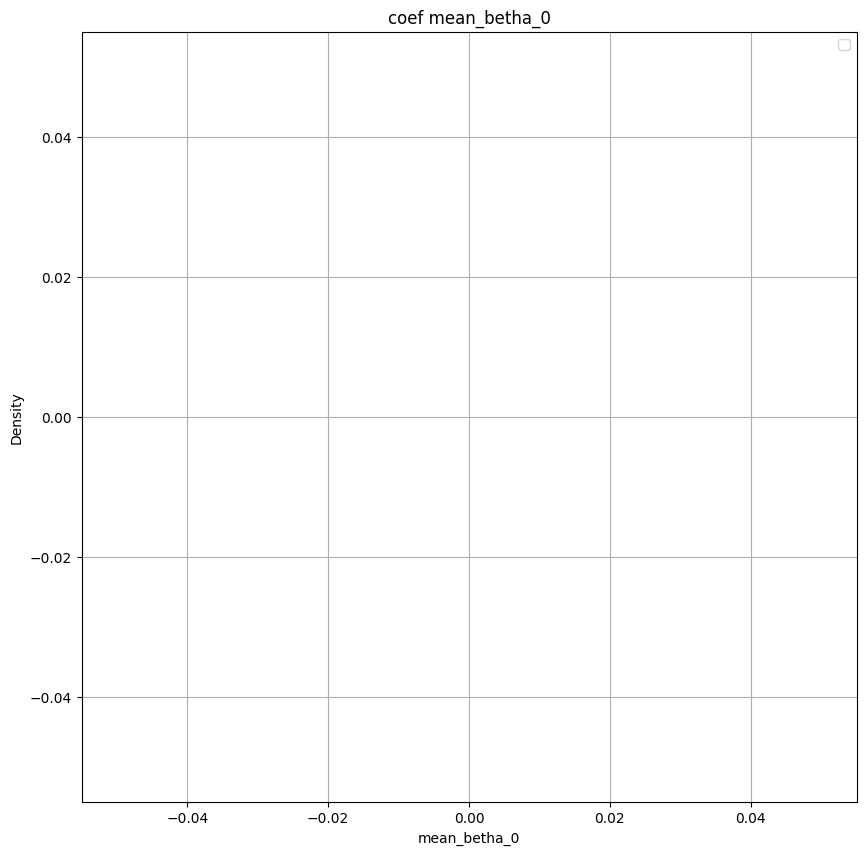

mean fault t :  -1.064104690388864  - mean fault :  -1.0649407894133562  - mean health :  -1.0523192416541698


<ipython-input-79-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-79-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-79-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-79-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

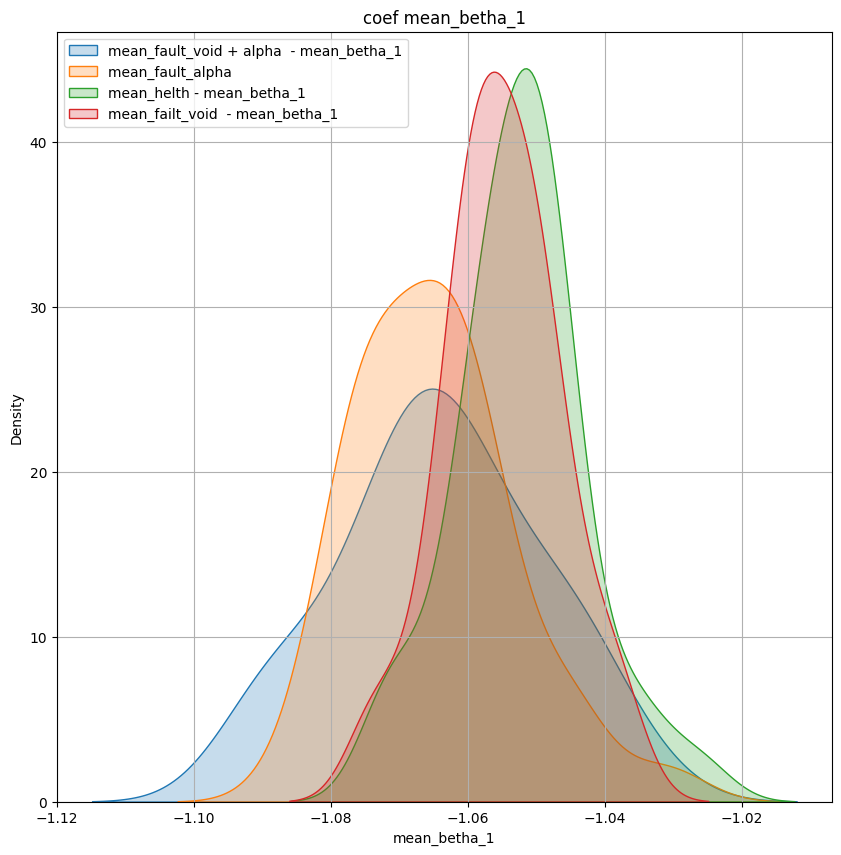

mean fault t :  -0.07420963291677661  - mean fault :  -0.07328957929188218  - mean health :  -0.07402679916464489


<ipython-input-79-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-79-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-79-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-79-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

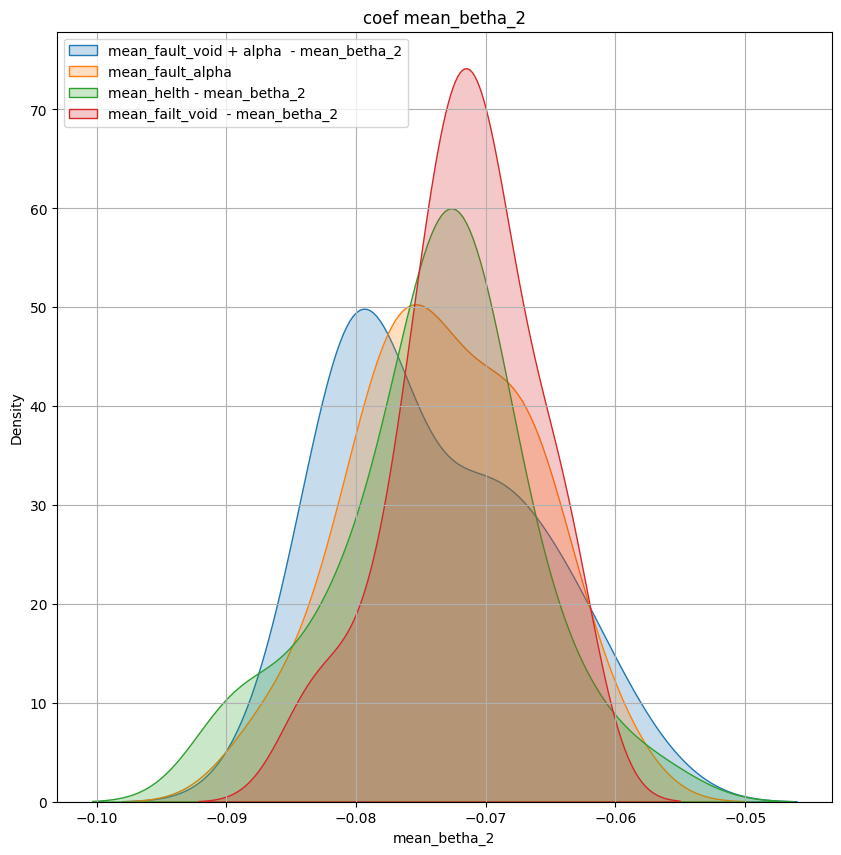

mean fault t :  2.811208812328181  - mean fault :  2.8113578684584986  - mean health :  2.788577950153987


<ipython-input-79-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-79-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-79-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-79-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

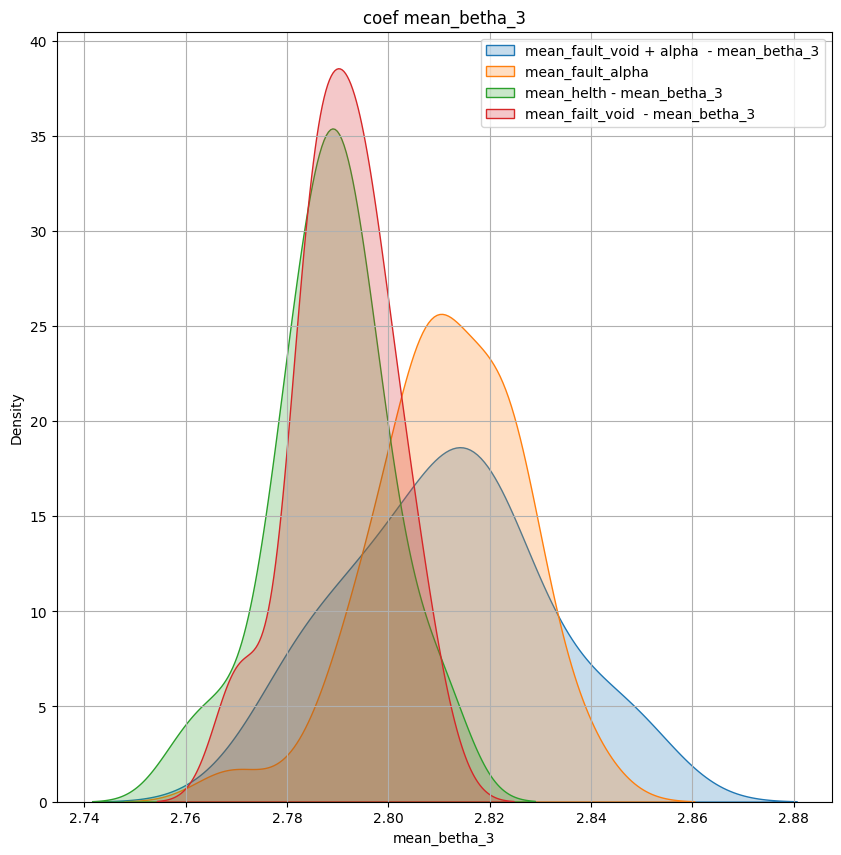

mean fault t :  0.08812816168061618  - mean fault :  0.0874781317946251  - mean health :  0.08820141461986847


<ipython-input-79-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-79-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-79-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-79-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

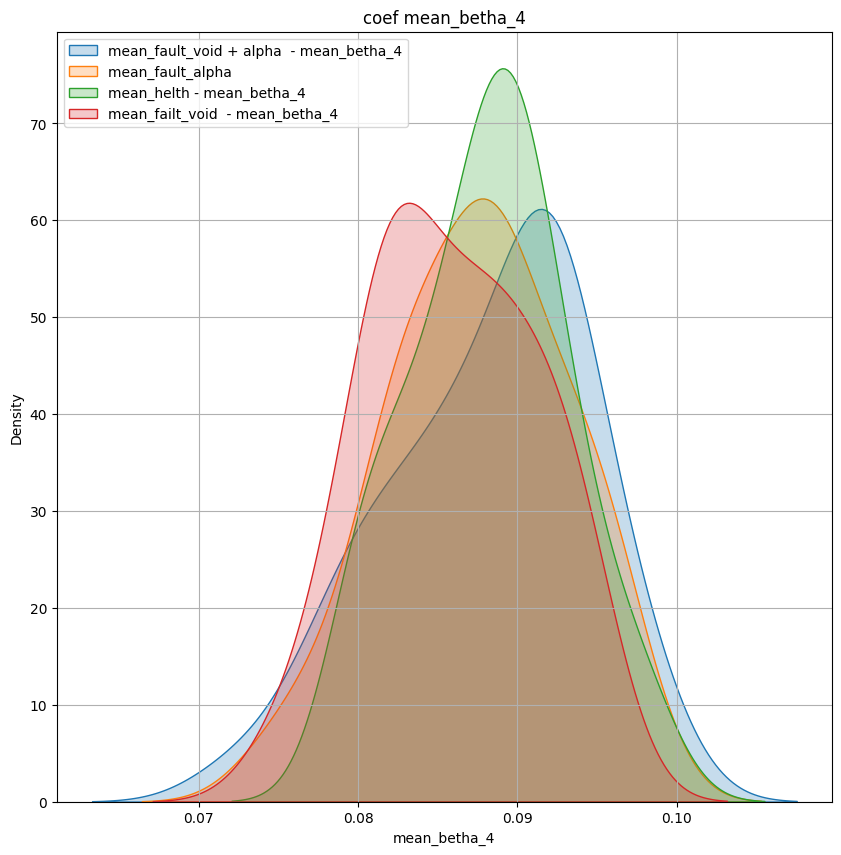

mean fault t :  -0.0157260752343937  - mean fault :  -0.015308319917712952  - mean health :  -0.015644094412882805


<ipython-input-79-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-79-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-79-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-79-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

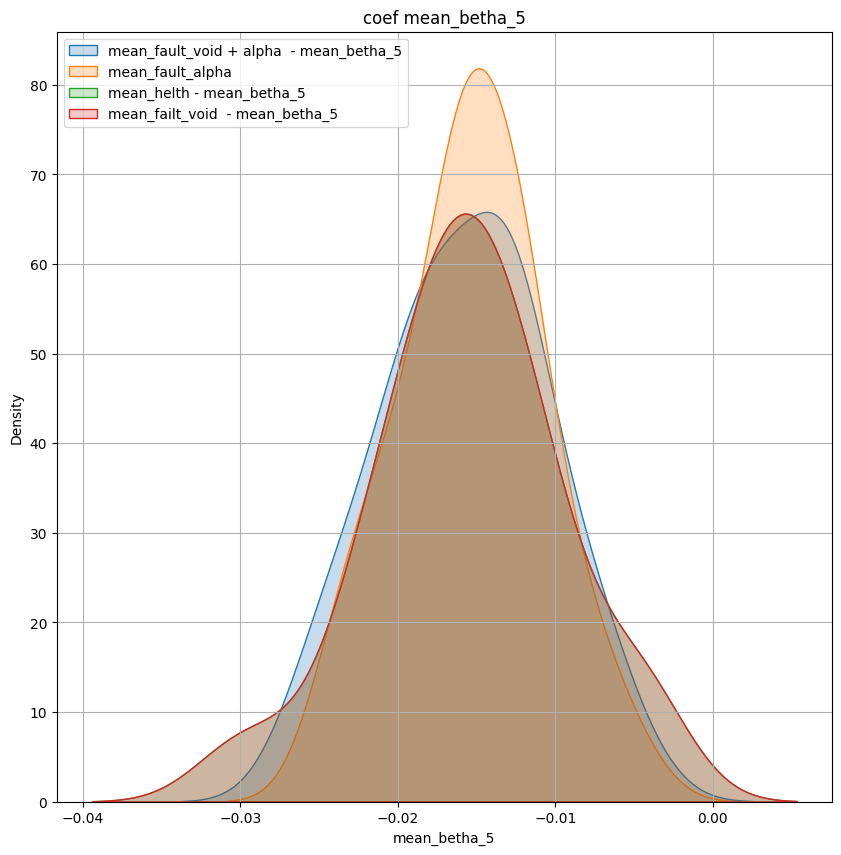

In [ ]:
for element in check_columns :
  fig = plt.figure(figsize = (10 , 10 ))
  ax0 = fig.add_subplot(111 )
  print("mean fault t : " , df_fault_t_mean_and_std[element].mean() , " - mean fault : " , df_fault_mean_and_std[element].mean() , " - mean health : " , df_health_mean_and_std[element].mean() )
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_failt_void  - {element} ' ,  shade=True  )
  plt.legend()
  plt.title(f"coef {element}")
  plt.grid()
  plt.show()

In [ ]:
df_result = pd.DataFrame(total_simulation)


In [ ]:
df_result.columns

Index(['bias_correlation', 'betha_0_correlation', 'betha_1_correlation',
       'betha_2_correlation', 'betha_3_correlation', 'betha_4_correlation',
       'betha_5_correlation', 'alpha', 'flap', 'accuracy_nav',
       'accuracy_random_forest', 'n_estimators_RF', 'max_features_RF',
       'max_depth_RF', 'criterion_RF', 'accuracy_extra_classifier',
       'accuracy_svc_', 'C_svc', 'kernel_svc', 'gamma_svc', 'ann'],
      dtype='object')

In [ ]:
df_result.head(5)

bias_correlation  betha_0_correlation  betha_1_correlation  \
0          0.006946                  NaN            -0.008207   
1          0.006055                  NaN            -0.026073   
2          0.003277                  NaN             0.007408   
3          0.005644                  NaN            -0.028539   
4          0.001912                  NaN             0.006513   

   betha_2_correlation  betha_3_correlation  betha_4_correlation  \
0             0.025212             0.011855            -0.023139   
1             0.032154             0.022664            -0.027636   
2             0.026932            -0.008641            -0.027064   
3             0.059844             0.024090            -0.031904   
4            -0.001921            -0.003647            -0.006606   

   betha_5_correlation  alpha  flap  accuracy_nav  ...  n_estimators_RF  \
0             0.011962  0.001     1      0.757576  ...              200   
1             0.004823  0.001     2      0.755051  ...              200   
2             0.011575  0.001     3      0.755051  ...              300   
3             0.040099  0.001     4      0.722222  ...              200   
4            -0.013625  0.002     1      0.747475  ...              200   

   max_features_RF max_depth_RF  criterion_RF accuracy_extra_classifier  \
0             sqrt            4       entropy                  0.724747   
1             sqrt            4          gini                  0.719697   
2             sqrt            4       entropy                  0.704545   
3             sqrt            4          gini                  0.712121   
4             sqrt            4          gini                  0.727273   

   accuracy_svc_  C_svc  kernel_svc gamma_svc      ann  
0       0.755051      1      linear       1.0  0.75505  
1       0.755051      1      linear       1.0  0.75505  
2       0.755051      1      linear       1.0  0.75505  
3       0.755051      1      linear       1.0  0.75505  
4       0.755051      1      linear       1.0  0.75505  

[5 rows x 21 columns]

In [ ]:
df_svc_group = df_result.groupby(['alpha' , 'flap' ]).agg({'accuracy_svc_' : ['max'] , 'accuracy_nav':['max'] , 'accuracy_extra_classifier' : ['max'] , 'ann':['max']})

In [ ]:
df_svc_group

accuracy_svc_ accuracy_nav accuracy_extra_classifier       ann
                     max          max                       max       max
alpha flap                                                               
0.001 1         0.755051     0.757576                  0.724747  0.755050
      2         0.755051     0.755051                  0.719697  0.755050
      3         0.755051     0.755051                  0.704545  0.755050
      4         0.755051     0.722222                  0.712121  0.755050
0.002 1         0.755051     0.747475                  0.727273  0.755050
      2         0.755051     0.755051                  0.709596  0.719697
      3         0.755051     0.755051                  0.727273  0.732323
      4         0.755051     0.744949                  0.732323  0.747475
0.003 1         0.755051     0.755051                  0.729798  0.755050
      2         0.755051     0.717172                  0.732323  0.755050
      3         0.755051     0.755051                  0.712121  0.755050
      4         0.755051     0.755051                  0.729798  0.755050
0.004 1         0.755051     0.755051                  0.717172  0.747475
      2         0.755051     0.755051                  0.727273  0.744950
      3         0.755051     0.755051                  0.727273  0.750000
      4         0.755051     0.755051                  0.734848  0.755050
0.005 1         0.755051     0.752525                  0.719697  0.755050
      2         0.755051     0.744949                  0.732323  0.755050
      3         0.755051     0.755051                  0.729798  0.755050
      4         0.755051     0.744949                  0.737374  0.755050
0.006 1         0.755051     0.755051                  0.722222  0.757576
      2         0.755051     0.755051                  0.707071  0.750000
      3         0.755051     0.755051                  0.732323  0.755050
      4         0.755051     0.742424                  0.686869  0.757576
0.007 1         0.755051     0.755051                  0.742424  0.757576
      2         0.755051     0.744949                  0.734848  0.755050
      3         0.755051     0.755051                  0.732323  0.757576
      4         0.755051     0.755051                  0.704545  0.755050
0.008 1         0.757576     0.755051                  0.719697  0.744950
      2         0.755051     0.755051                  0.727273  0.755050
      3         0.755051     0.752525                  0.729798  0.750000
      4         0.755051     0.755051                  0.699495  0.750000
0.009 1         0.755051     0.750000                  0.737374  0.752525
      2         0.755051     0.755051                  0.724747  0.752525
      3         0.755051     0.755051                  0.712121  0.744950
      4         0.755051     0.750000                  0.727273  0.755050

In [ ]:
df_svc_group.plot(x = 'alpha' , y = 'accuracy_svc_mean')

KeyError: 'alpha'

InvalidIndexError: (slice(None, None, None), 3)

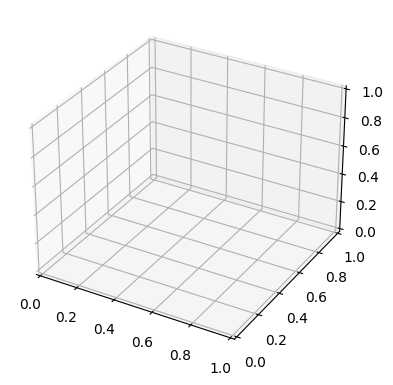

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_svc_group.iloc[: , 0 ] , df_svc_group.iloc[: , 1 ] , df_svc_group[: , 3])
plt.legend()
plt.grid()
plt.show()

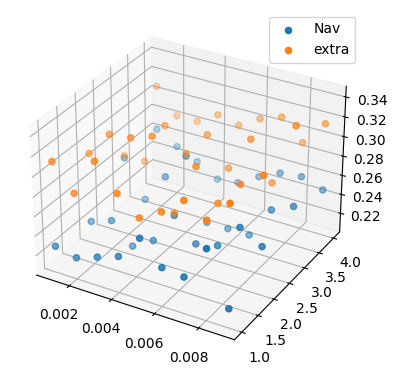

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 9] , label='Nav')
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 15] , label='extra')
plt.legend()
plt.grid()
plt.show()

In [ ]:
df_result.head()

bias_correlation  betha_0_correlation  betha_1_correlation  \
0          0.005823                  NaN             0.001001   
1          0.005453                  NaN            -0.001781   
2          0.007594                  NaN             0.019759   
3          0.005758                  NaN             0.005867   
4          0.010872                  NaN             0.016624   

   betha_2_correlation  betha_3_correlation  betha_4_correlation  \
0             0.003920             0.005154             0.006791   
1             0.025367             0.007664            -0.014624   
2             0.033610            -0.014438            -0.029723   
3            -0.043981             0.004558             0.017767   
4             0.012214            -0.009678            -0.036455   

   betha_5_correlation  alpha  flap  accuracy_nav  ...  n_estimators_RF  \
0             0.014571  0.001     1      0.227273  ...              200   
1             0.031132  0.001     2      0.222222  ...              200   
2             0.031067  0.001     3      0.260101  ...              200   
3            -0.040836  0.001     4      0.262626  ...              200   
4            -0.013340  0.002     1      0.222222  ...              200   

   max_features_RF max_depth_RF  criterion_RF accuracy_extra_classifier  \
0             sqrt            8       entropy                  0.313131   
1             sqrt            4          gini                  0.292929   
2             sqrt            5          gini                  0.262626   
3             sqrt            7          gini                  0.308081   
4             sqrt            8          gini                  0.287879   

   accuracy_svc_  C_svc  kernel_svc gamma_svc       ann  
0       0.318182    100         rbf       0.1  0.366162  
1       0.343434   1000         rbf       0.1  0.431818  
2       0.351010    100         rbf       0.1  0.373737  
3       0.343434    100         rbf       0.1  0.388889  
4       0.330808    100         rbf       0.1  0.378788  

[5 rows x 21 columns]

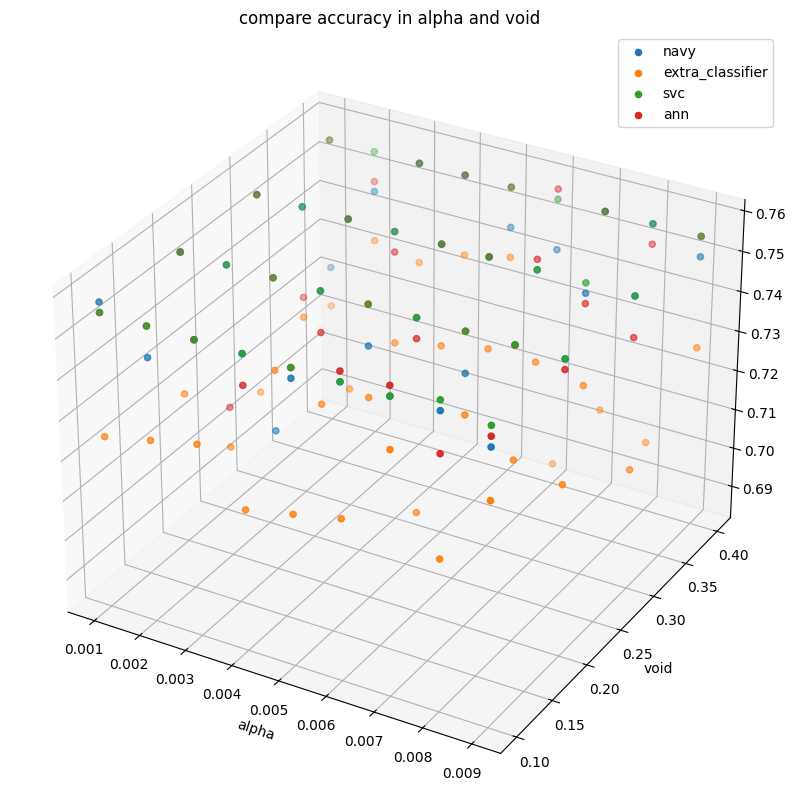

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( projection='3d' )
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 9 ] , label = 'navy')
# ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[: , -1 ] , label = 'ann')
plt.title("compare accuracy in alpha and void  ")
plt.xlabel("alpha")
plt.ylabel("void")
plt.legend()
plt.grid()
plt.show()

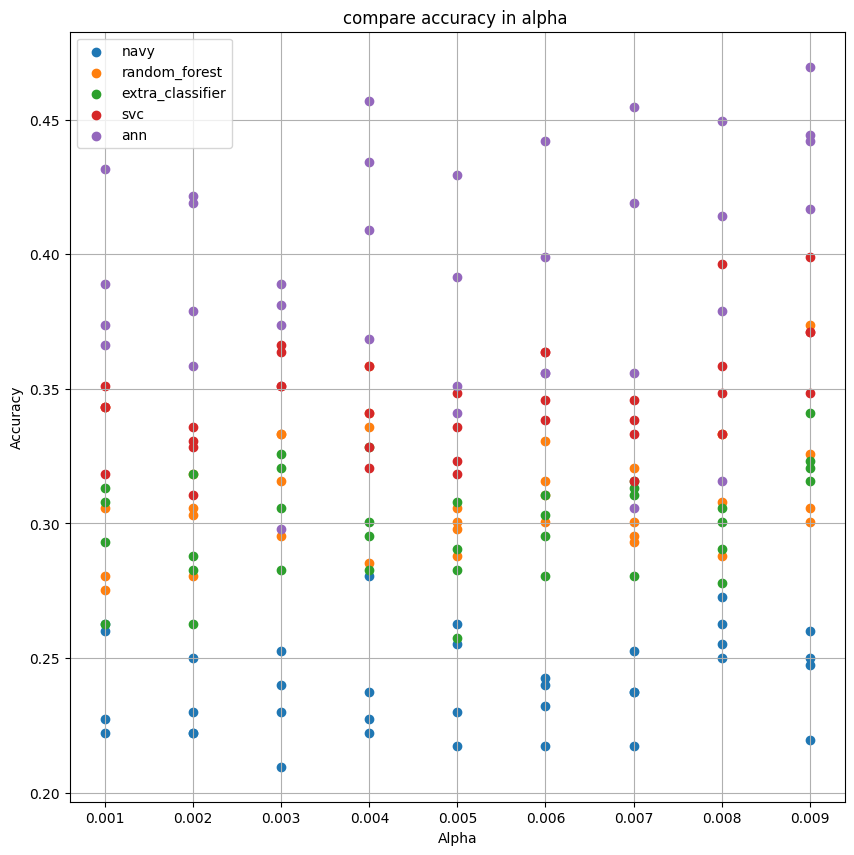

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( )
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 9 ] , label = 'navy')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[: , -1 ] , label = 'ann')
plt.title("compare accuracy in alpha ")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

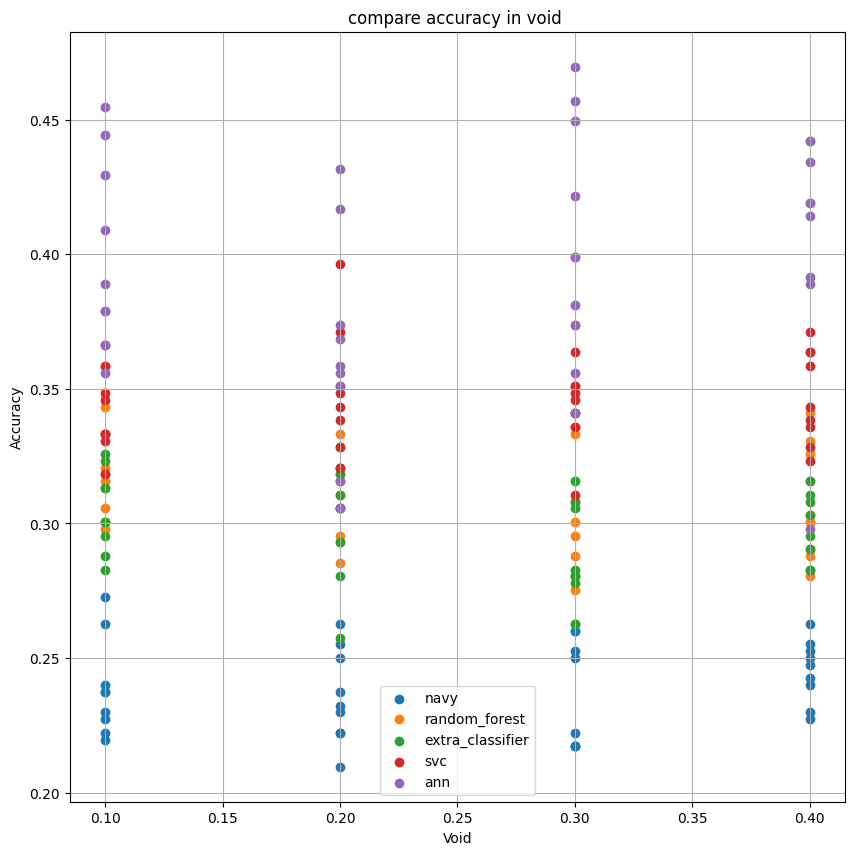

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( )
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 9 ] , label = 'navy')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[: , -1 ] , label = 'ann')
plt.title("compare accuracy in void ")
plt.ylabel("Accuracy")
plt.xlabel("Void")
plt.legend()
plt.grid()
plt.show()

In [ ]:
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[: , -1 ] , label = 'ann')

In [ ]:
filtering = []
for element in ['accuracy_nav' , 'accuracy_extra_classifier' , 'accuracy_svc_' , 'ann' ] :
  for alpha in range(35 , 100 ) :
    df_filter = df_result[  df_result[f'{element}'] > alpha/ 100  ]
    if len(df_filter )> 1 :
      filtering.append([element , df_filter ])
      print(f"alpha : {alpha}")





alpha : 35
alpha : 36
alpha : 37
alpha : 38
alpha : 39
alpha : 35
alpha : 36
alpha : 37
alpha : 38
alpha : 39
alpha : 40
alpha : 41
alpha : 42
alpha : 43
alpha : 44
alpha : 45


In [ ]:
pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_failt_void  - {element} ' ,  shade=True  )

In [ ]:
df_health_mean_and_std

mean_bias  std_bias  mean_betha_0  std_betha_0  mean_betha_1  std_betha_1  \
0    1.745096  0.260044           0.0          0.0     -1.056804     0.209541   
1    1.743771  0.259850           0.0          0.0     -1.052916     0.209514   
2    1.744674  0.260548           0.0          0.0     -1.064317     0.228728   
3    1.745513  0.263405           0.0          0.0     -1.051934     0.222952   
4    1.745718  0.261954           0.0          0.0     -1.066218     0.213009   
5    1.745354  0.259632           0.0          0.0     -1.040883     0.220720   
6    1.745758  0.261151           0.0          0.0     -1.060306     0.218404   
7    1.743547  0.261929           0.0          0.0     -1.044999     0.198916   
8    1.744652  0.260282           0.0          0.0     -1.057789     0.228974   
9    1.744652  0.259202           0.0          0.0     -1.049872     0.213846   
10   1.743899  0.260626           0.0          0.0     -1.033249     0.215798   
11   1.744658  0.262614           0.0          0.0     -1.063519     0.218847   
12   1.742473  0.259121           0.0          0.0     -1.054925     0.221413   
13   1.746919  0.260974           0.0          0.0     -1.069843     0.217868   
14   1.746585  0.259916           0.0          0.0     -1.069560     0.206451   
15   1.745988  0.260131           0.0          0.0     -1.055882     0.203127   
16   1.741363  0.263372           0.0          0.0     -1.042553     0.187553   
17   1.744247  0.262747           0.0          0.0     -1.043407     0.199553   
18   1.746690  0.260791           0.0          0.0     -1.069399     0.213717   
19   1.744631  0.259252           0.0          0.0     -1.048203     0.197722   
20   1.744674  0.259259           0.0          0.0     -1.046035     0.203682   
21   1.743871  0.260415           0.0          0.0     -1.022754     0.189713   
22   1.746538  0.263000           0.0          0.0     -1.051241     0.211671   
23   1.744375  0.261703           0.0          0.0     -1.054679     0.218117   
24   1.746706  0.260123           0.0          0.0     -1.065449     0.232753   
25   1.744331  0.259938           0.0          0.0     -1.050956     0.204230   
26   1.745919  0.259362           0.0          0.0     -1.063716     0.216656   
27   1.745371  0.261040           0.0          0.0     -1.057292     0.223788   
28   1.745133  0.262354           0.0          0.0     -1.057223     0.198876   
29   1.746118  0.258986           0.0          0.0     -1.051789     0.218325   
30   1.746252  0.260540           0.0          0.0     -1.068512     0.217131   
31   1.747657  0.262461           0.0          0.0     -1.060993     0.218360   
32   1.746286  0.262670           0.0          0.0     -1.061852     0.219359   
33   1.744852  0.260907           0.0          0.0     -1.061068     0.215419   
34   1.746847  0.262537           0.0          0.0     -1.070608     0.211399   
35   1.744446  0.260934           0.0          0.0     -1.051441     0.203526   

    mean_betha_2  std_betha_2  mean_betha_3  std_betha_3  mean_betha_4  \
0      -0.073644     0.129760      2.792884     0.254739      0.085743   
1      -0.070774     0.128498      2.786919     0.242870      0.087968   
2      -0.075731     0.127595      2.803297     0.273284      0.093156   
3      -0.065644     0.126159      2.788059     0.268972      0.086049   
4      -0.077022     0.122878      2.806160     0.243853      0.092807   
5      -0.053424     0.116957      2.769159     0.231894      0.075753   
6      -0.076965     0.119729      2.797138     0.265604      0.086147   
7      -0.062144     0.124853      2.774780     0.232874      0.076620   
8      -0.060869     0.123678      2.793185     0.257332      0.086512   
9      -0.070179     0.116421      2.783019     0.246992      0.085936   
10     -0.070322     0.130992      2.765715     0.250063      0.087518   
11     -0.069606     0.122452      2.799258     0.281986      0.083964   
12     -0.057605     0.124472      2.783047 

In [ ]:
check_columns

['mean_bias',
 'mean_betha_0',
 'mean_betha_1',
 'mean_betha_2',
 'mean_betha_3',
 'mean_betha_4',
 'mean_betha_5']

In [ ]:
df_health_mean_and_std

mean_bias  std_bias  mean_betha_0  std_betha_0  mean_betha_1  std_betha_1  \
0    1.745096  0.260044           0.0          0.0     -1.056804     0.209541   
1    1.743771  0.259850           0.0          0.0     -1.052916     0.209514   
2    1.744674  0.260548           0.0          0.0     -1.064317     0.228728   
3    1.745513  0.263405           0.0          0.0     -1.051934     0.222952   
4    1.745718  0.261954           0.0          0.0     -1.066218     0.213009   
5    1.745354  0.259632           0.0          0.0     -1.040883     0.220720   
6    1.745758  0.261151           0.0          0.0     -1.060306     0.218404   
7    1.743547  0.261929           0.0          0.0     -1.044999     0.198916   
8    1.744652  0.260282           0.0          0.0     -1.057789     0.228974   
9    1.744652  0.259202           0.0          0.0     -1.049872     0.213846   
10   1.743899  0.260626           0.0          0.0     -1.033249     0.215798   
11   1.744658  0.262614           0.0          0.0     -1.063519     0.218847   
12   1.742473  0.259121           0.0          0.0     -1.054925     0.221413   
13   1.746919  0.260974           0.0          0.0     -1.069843     0.217868   
14   1.746585  0.259916           0.0          0.0     -1.069560     0.206451   
15   1.745988  0.260131           0.0          0.0     -1.055882     0.203127   
16   1.741363  0.263372           0.0          0.0     -1.042553     0.187553   
17   1.744247  0.262747           0.0          0.0     -1.043407     0.199553   
18   1.746690  0.260791           0.0          0.0     -1.069399     0.213717   
19   1.744631  0.259252           0.0          0.0     -1.048203     0.197722   
20   1.744674  0.259259           0.0          0.0     -1.046035     0.203682   
21   1.743871  0.260415           0.0          0.0     -1.022754     0.189713   
22   1.746538  0.263000           0.0          0.0     -1.051241     0.211671   
23   1.744375  0.261703           0.0          0.0     -1.054679     0.218117   
24   1.746706  0.260123           0.0          0.0     -1.065449     0.232753   
25   1.744331  0.259938           0.0          0.0     -1.050956     0.204230   
26   1.745919  0.259362           0.0          0.0     -1.063716     0.216656   
27   1.745371  0.261040           0.0          0.0     -1.057292     0.223788   
28   1.745133  0.262354           0.0          0.0     -1.057223     0.198876   
29   1.746118  0.258986           0.0          0.0     -1.051789     0.218325   
30   1.746252  0.260540           0.0          0.0     -1.068512     0.217131   
31   1.747657  0.262461           0.0          0.0     -1.060993     0.218360   
32   1.746286  0.262670           0.0          0.0     -1.061852     0.219359   
33   1.744852  0.260907           0.0          0.0     -1.061068     0.215419   
34   1.746847  0.262537           0.0          0.0     -1.070608     0.211399   
35   1.744446  0.260934           0.0          0.0     -1.051441     0.203526   

    mean_betha_2  std_betha_2  mean_betha_3  std_betha_3  mean_betha_4  \
0      -0.073644     0.129760      2.792884     0.254739      0.085743   
1      -0.070774     0.128498      2.786919     0.242870      0.087968   
2      -0.075731     0.127595      2.803297     0.273284      0.093156   
3      -0.065644     0.126159      2.788059     0.268972      0.086049   
4      -0.077022     0.122878      2.806160     0.243853      0.092807   
5      -0.053424     0.116957      2.769159     0.231894      0.075753   
6      -0.076965     0.119729      2.797138     0.265604      0.086147   
7      -0.062144     0.124853      2.774780     0.232874      0.076620   
8      -0.060869     0.123678      2.793185     0.257332      0.086512   
9      -0.070179     0.116421      2.783019     0.246992      0.085936   
10     -0.070322     0.130992      2.765715     0.250063      0.087518   
11     -0.069606     0.122452      2.799258     0.281986      0.083964   
12     -0.057605     0.124472      2.783047 

{'norm': {'loc': -0.06933426472331158, 'scale': 0.006011588681168787}}

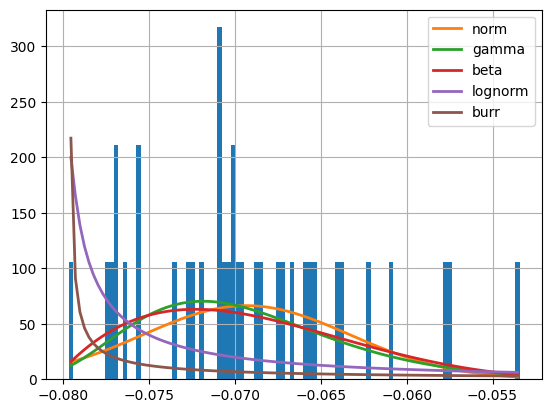

In [ ]:
# for element in check_columns :
#   for df in [df_fault_t_mean_and_std , df_fault_mean_and_std , df_health_mean_and_std  , df_health_t_mean_and_std ] :
# [df_fault_t_mean_and_std , df_health_mean_and_std , df_fault_mean_and_std ,df_health_t_mean_and_std ]

f = Fitter( df_health_mean_and_std['mean_betha_2'] ,
              distributions=['gamma',
                            'lognorm',
                            "beta",
                            "burr",
                            "norm" ])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [ ]:
for j in range(len(filtering)) :
  print(filtering[j][0])
  df_filtered = filtering[0][1]

In [ ]:
len(filtering)

0

In [ ]:
filtering[0]

bias_correlation  betha_0_correlation  betha_1_correlation  \
0           0.005823                  NaN             0.001001   
1           0.005453                  NaN            -0.001781   
2           0.007594                  NaN             0.019759   
3           0.005758                  NaN             0.005867   
4           0.010872                  NaN             0.016624   
5           0.012011                  NaN            -0.038916   
6           0.008474                  NaN             0.030581   
7           0.013813                  NaN            -0.017359   
8           0.014761                  NaN             0.006313   
9           0.013405                  NaN            -0.018928   
10          0.015037                  NaN            -0.036843   
11          0.012310                  NaN            -0.004983   
12          0.018493                  NaN            -0.019201   
13          0.010987                  NaN            -0.000233   
14          0.013267                  NaN            -0.000631   
15          0.015390                  NaN            -0.010582   
16          0.019871                  NaN            -0.039564   
17          0.019367                  NaN            -0.062589   
18          0.012374                  NaN             0.017966   
19          0.015427                  NaN            -0.023243   
20          0.019943                  NaN            -0.038456   
21          0.019929                  NaN            -0.050488   
22          0.016385                  NaN            -0.028753   
23          0.020084                  NaN            -0.018931   
24          0.023372                  NaN            -0.008376   
25          0.019514                  NaN            -0.024352   
26          0.018370                  NaN            -0.029345   
27          0.021139                  NaN            -0.014414   
28          0.020016                  NaN            -0.048479   
29          0.021123                  NaN            -0.021152   
30          0.017990                  NaN            -0.003937   
31          0.020119                  NaN            -0.026023   
32          0.022949                  NaN             0.002915   
33          0.026402                  NaN            -0.028408   
34          0.026008                  NaN            -0.042522   
35          0.025567                  NaN            -0.052834   

    betha_2_correlation  betha_3_correlation  betha_4_correlation  \
0              0.003920             0.005154             0.006791   
1              0.025367             0.007664            -0.014624   
2              0.033610            -0.014438            -0.029723   
3             -0.043981             0.004558             0.017767   
4              0.012214            -0.009678            -0.036455   
5             -0.022176             0.054645             0.004647   
6              0.026068            -0.020897            -0.007932   
7             -0.014591             0.033190             0.019780   
8              0.014341             0.006112            -0.021216   
9              0.023174             0.027190            -0.039146   
10            -0.004214             0.051721             0.009669   
11            -0.012439             0.020131             0.022597   
12            -0.065047             0.048108             0.056445   
13            -0.021902             0.016173             0.026583   
14            -0.029037             0.020475             0.020312   
15            -0.009485             0.024922            -0.005300   
16             0.008741             0.053482            -0.020276   
17             0.037246             0.070526            -0.050728   
18            -0.049351             0.004595             0.027971   
19            -0.019224             0.042594             0.016470   
20             0.007663             0.056811             0.016693   
21            -0.002593             0.06264

In [ ]:
df_result.groupby("alpha" , "flap").agg({'navy':[]})

ValueError: No axis named flap for object type DataFrame

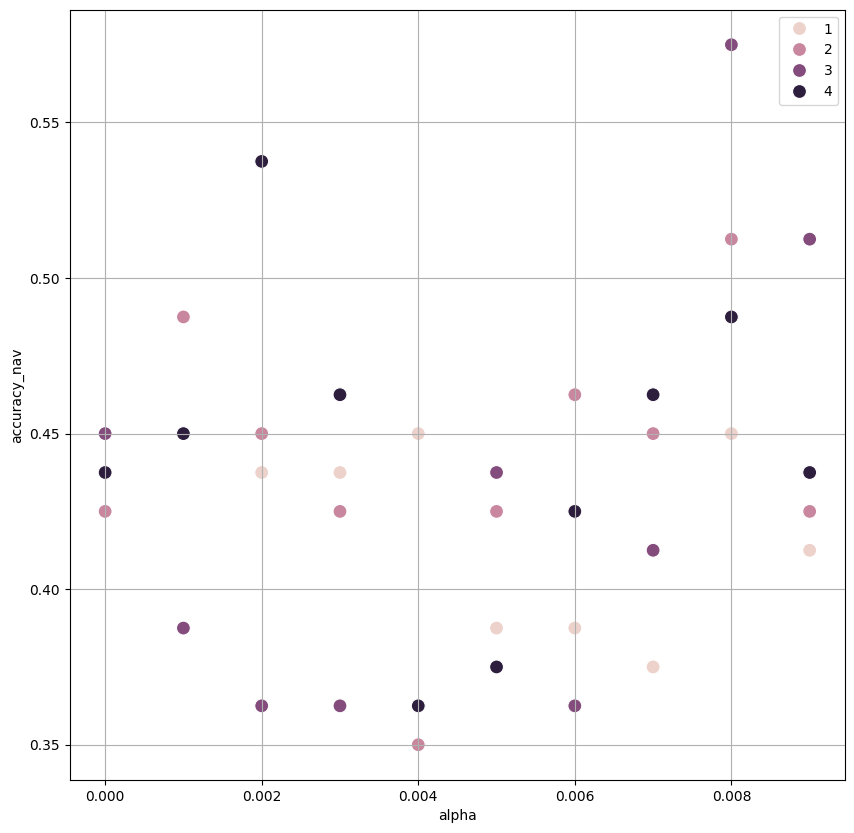

In [ ]:
plt.figure(figsize = (10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="accuracy_nav", hue="flap" , s = 100  )
plt.legend()
plt.grid()
plt.show()

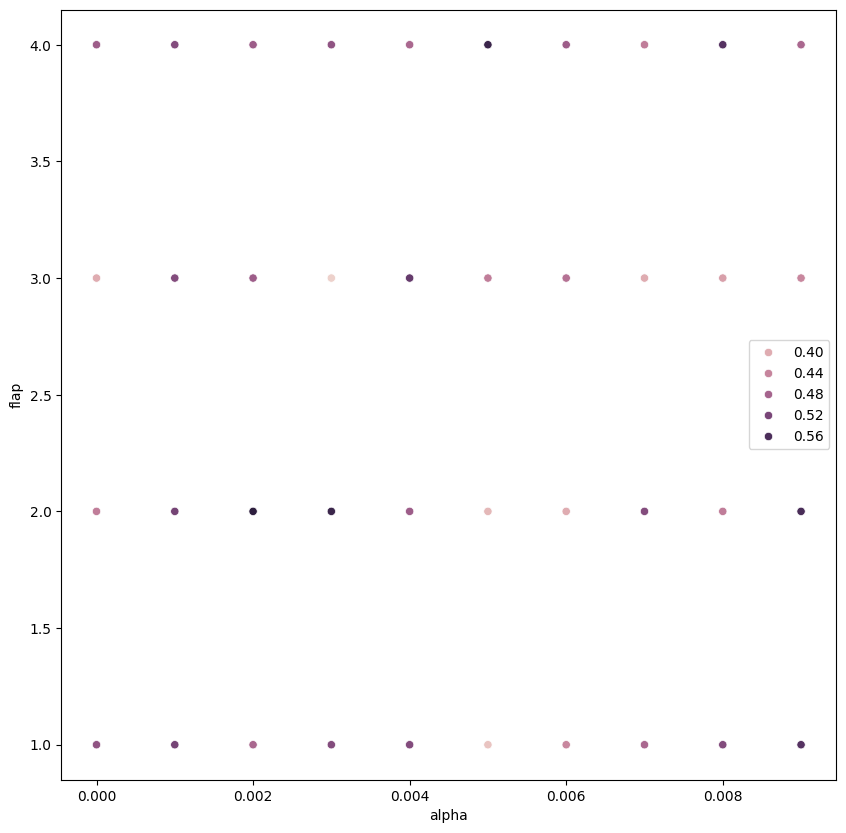

In [ ]:
plt.figure(figsize=(10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="flap", hue="accuracy_svc_", hue_order = ["linear" , "rbf" ] )
plt.legend()
plt.show()

In [ ]:
df_result['flap'].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

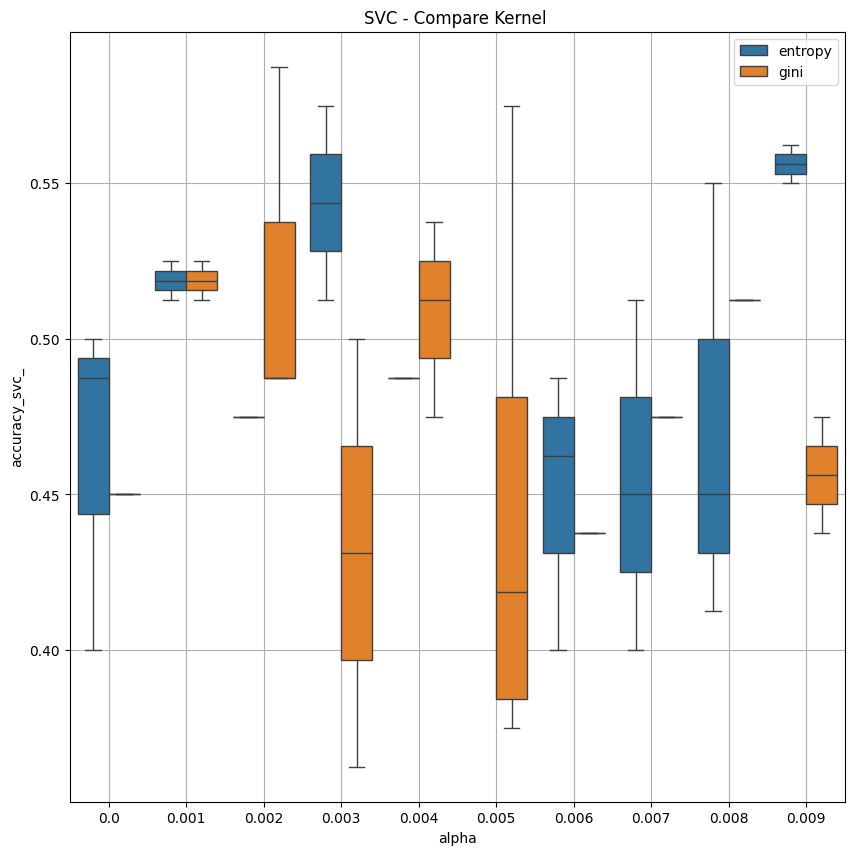

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='criterion_RF', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

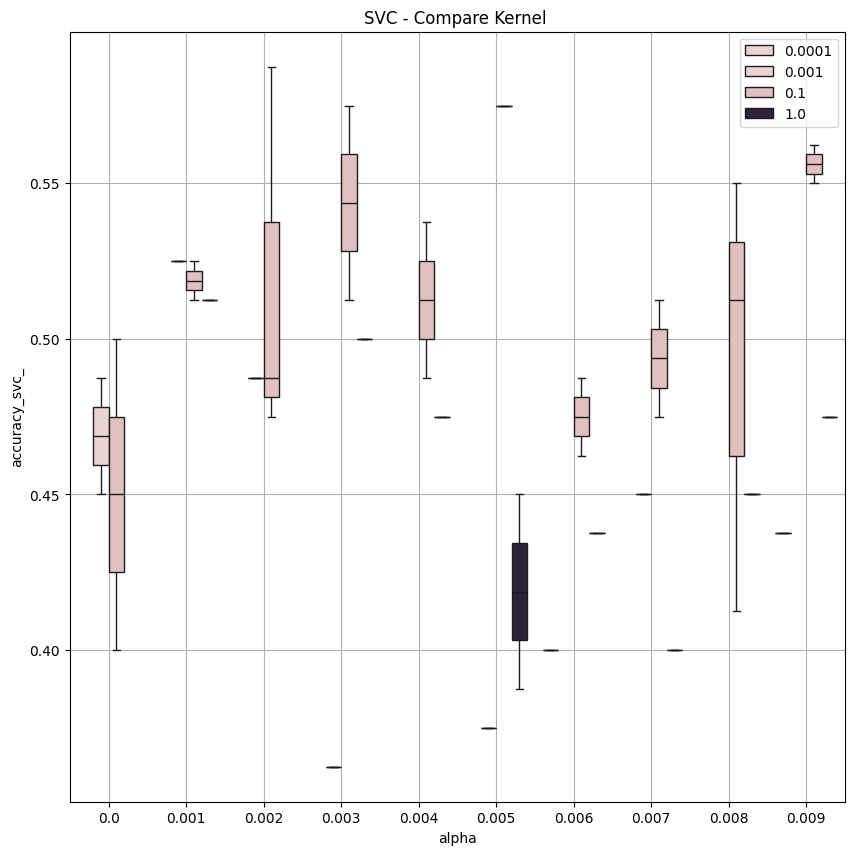

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='gamma_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

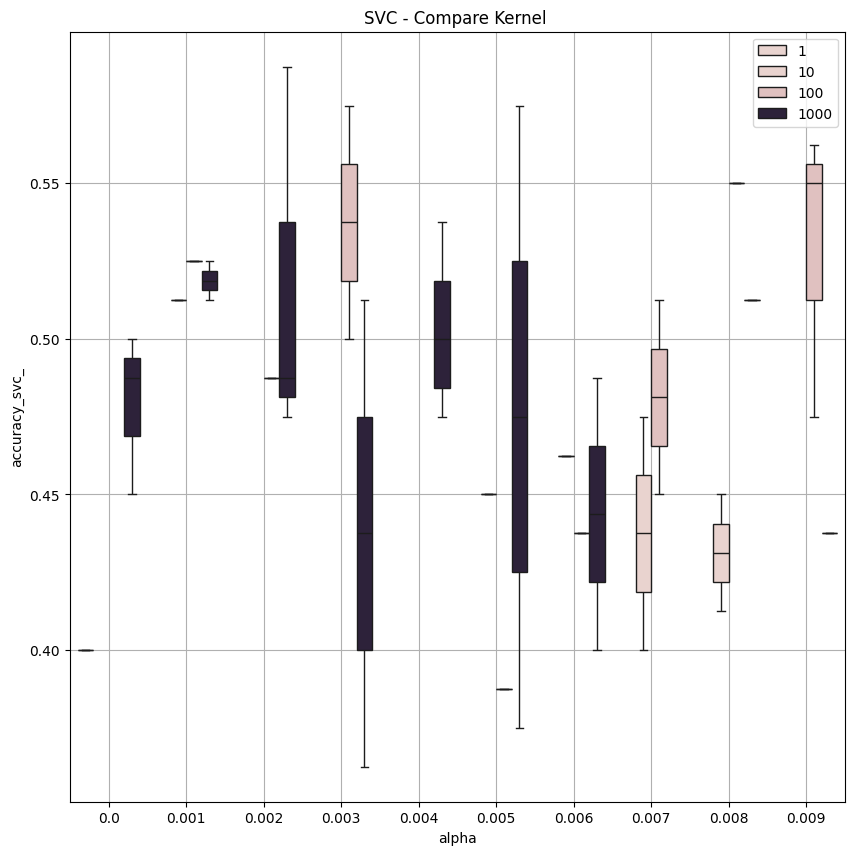

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='C_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


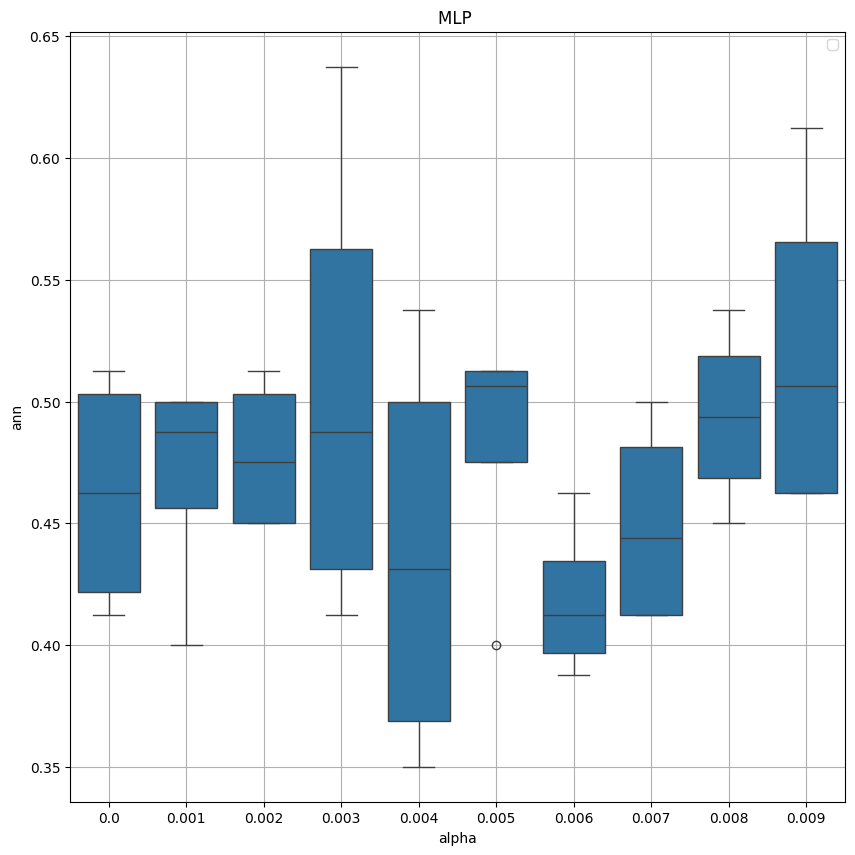

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="ann" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
accuracy_nav

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_nav" , hue="flap" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
